In [1]:
# pip install TextBlob

In [2]:
import pandas as pd
import glob
from textblob import TextBlob
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import Word
from sklearn.preprocessing import Binarizer
from sklearn.preprocessing import StandardScaler
import joblib


import re
from contractions import contractions

sns.set(rc={'figure.figsize':(18,9)})

# Sentiment Analysis

### Sentiment Analysis for ETH

In [3]:
# read all files in folder

path = "../data/eth_tweets"
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0)
    df['date'] = filename.replace(".csv", "").replace(f"{path}/", "")
    print(f"{filename} read")
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

../data/eth_tweets/2016-3-24.csv read
../data/eth_tweets/2017-3-30.csv read
../data/eth_tweets/2017-3-24.csv read
../data/eth_tweets/2016-3-30.csv read
../data/eth_tweets/2016-3-18.csv read
../data/eth_tweets/2016-4-11.csv read
../data/eth_tweets/2017-3-18.csv read
../data/eth_tweets/2017-4-11.csv read
../data/eth_tweets/2017-11-10.csv read
../data/eth_tweets/2016-10-27.csv read
../data/eth_tweets/2020-7-3.csv read
../data/eth_tweets/2018-8-5.csv read
../data/eth_tweets/2020-12-17.csv read
../data/eth_tweets/2017-5-6.csv read
../data/eth_tweets/2020-10-8.csv read
../data/eth_tweets/2016-7-1.csv read
../data/eth_tweets/2019-8-30.csv read
../data/eth_tweets/2019-1-14.csv read
../data/eth_tweets/2018-8-24.csv read
../data/eth_tweets/2018-8-30.csv read
../data/eth_tweets/2019-8-24.csv read
../data/eth_tweets/2018-1-14.csv read
../data/eth_tweets/2018-4-8.csv read
../data/eth_tweets/2020-9-14.csv read
../data/eth_tweets/2018-10-10.csv read
../data/eth_tweets/2019-11-27.csv read
../data/eth_

../data/eth_tweets/2021-2-23.csv read
../data/eth_tweets/2017-7-6.csv read
../data/eth_tweets/2020-12-8.csv read
../data/eth_tweets/2016-5-1.csv read
../data/eth_tweets/2020-5-3.csv read
../data/eth_tweets/2019-8-2.csv read
../data/eth_tweets/2020-7-13.csv read
../data/eth_tweets/2019-6-23.csv read
../data/eth_tweets/2019-11-25.csv read
../data/eth_tweets/2018-10-12.csv read
../data/eth_tweets/2018-6-23.csv read
../data/eth_tweets/2017-9-9.csv read
../data/eth_tweets/2018-8-26.csv read
../data/eth_tweets/2019-1-16.csv read
../data/eth_tweets/2019-11-19.csv read
../data/eth_tweets/2020-9-16.csv read
../data/eth_tweets/2018-1-16.csv read
../data/eth_tweets/2019-8-26.csv read
../data/eth_tweets/2016-10-19.csv read
../data/eth_tweets/2017-5-4.csv read
../data/eth_tweets/2020-12-29.csv read
../data/eth_tweets/2016-7-3.csv read
../data/eth_tweets/2018-8-7.csv read
../data/eth_tweets/2020-7-1.csv read
../data/eth_tweets/2016-10-25.csv read
../data/eth_tweets/2017-11-12.csv read
../data/eth_tw

../data/eth_tweets/2021-2-25.csv read
../data/eth_tweets/2020-2-25.csv read
../data/eth_tweets/2019-3-15.csv read
../data/eth_tweets/2018-4-20.csv read
../data/eth_tweets/2021-2-19.csv read
../data/eth_tweets/2018-3-29.csv read
../data/eth_tweets/2020-5-10.csv read
../data/eth_tweets/2019-4-20.csv read
../data/eth_tweets/2018-12-11.csv read
../data/eth_tweets/2019-3-29.csv read
../data/eth_tweets/2020-2-19.csv read
../data/eth_tweets/2019-8-4.csv read
../data/eth_tweets/2018-11-8.csv read
../data/eth_tweets/2020-5-5.csv read
../data/eth_tweets/2019-11-8.csv read
../data/eth_tweets/2016-5-7.csv read
../data/eth_tweets/2020-9-10.csv read
../data/eth_tweets/2018-1-10.csv read
../data/eth_tweets/2019-8-20.csv read
../data/eth_tweets/2018-6-19.csv read
../data/eth_tweets/2018-8-20.csv read
../data/eth_tweets/2019-1-10.csv read
../data/eth_tweets/2019-6-19.csv read
../data/eth_tweets/2018-10-28.csv read
../data/eth_tweets/2020-7-29.csv read
../data/eth_tweets/2018-6-25.csv read
../data/eth_t

../data/eth_tweets/2021-1-11.csv read
../data/eth_tweets/2020-8-21.csv read
../data/eth_tweets/2018-7-28.csv read
../data/eth_tweets/2018-11-25.csv read
../data/eth_tweets/2019-10-12.csv read
../data/eth_tweets/2019-7-14.csv read
../data/eth_tweets/2020-6-24.csv read
../data/eth_tweets/2020-6-30.csv read
../data/eth_tweets/2018-7-14.csv read
../data/eth_tweets/2016-4-2.csv read
../data/eth_tweets/2017-10-25.csv read
../data/eth_tweets/2016-11-12.csv read
../data/eth_tweets/2017-6-5.csv read
../data/eth_tweets/2017-10-31.csv read
../data/eth_tweets/2019-9-1.csv read
../data/eth_tweets/2017-10-19.csv read
../data/eth_tweets/2016-5-18.csv read
../data/eth_tweets/2016-2-11.csv read
../data/eth_tweets/2017-5-18.csv read
../data/eth_tweets/2017-2-11.csv read
../data/eth_tweets/2018-5-9.csv read
../data/eth_tweets/2016-5-24.csv read
../data/eth_tweets/2017-5-30.csv read
../data/eth_tweets/2017-5-24.csv read
../data/eth_tweets/2016-5-30.csv read
../data/eth_tweets/2017-12-20.csv read
../data/e

../data/eth_tweets/2018-9-16.csv read
../data/eth_tweets/2019-10-29.csv read
../data/eth_tweets/2020-8-26.csv read
../data/eth_tweets/2021-1-16.csv read
../data/eth_tweets/2019-9-16.csv read
../data/eth_tweets/2016-8-8.csv read
../data/eth_tweets/2020-6-23.csv read
../data/eth_tweets/2019-10-15.csv read
../data/eth_tweets/2019-7-13.csv read
../data/eth_tweets/2018-11-22.csv read
../data/eth_tweets/2018-7-13.csv read
../data/eth_tweets/2016-6-7.csv read
../data/eth_tweets/2021-4-2.csv read
../data/eth_tweets/2018-12-8.csv read
../data/eth_tweets/2019-12-8.csv read
../data/eth_tweets/2018-9-3.csv read
../data/eth_tweets/2020-6-5.csv read
../data/eth_tweets/2018-9-2.csv read
../data/eth_tweets/2019-12-9.csv read
../data/eth_tweets/2020-6-4.csv read
../data/eth_tweets/2018-12-9.csv read
../data/eth_tweets/2021-4-3.csv read
../data/eth_tweets/2017-4-1.csv read
../data/eth_tweets/2016-6-6.csv read
../data/eth_tweets/2018-7-12.csv read
../data/eth_tweets/2018-11-23.csv read
../data/eth_tweets

../data/eth_tweets/2020-6-10.csv read
../data/eth_tweets/2019-7-20.csv read
../data/eth_tweets/2019-10-26.csv read
../data/eth_tweets/2018-11-11.csv read
../data/eth_tweets/2020-1-19.csv read
../data/eth_tweets/2018-9-19.csv read
../data/eth_tweets/2018-7-20.csv read
../data/eth_tweets/2016-8-7.csv read
../data/eth_tweets/2021-1-19.csv read
../data/eth_tweets/2019-9-19.csv read
../data/eth_tweets/2020-8-29.csv read
../data/eth_tweets/2021-1-31.csv read
../data/eth_tweets/2018-7-3.csv read
../data/eth_tweets/2020-1-25.csv read
../data/eth_tweets/2018-9-25.csv read
../data/eth_tweets/2020-8-5.csv read
../data/eth_tweets/2020-1-31.csv read
../data/eth_tweets/2020-8-15.csv read
../data/eth_tweets/2019-5-4.csv read
../data/eth_tweets/2021-1-25.csv read
../data/eth_tweets/2019-9-25.csv read
../data/eth_tweets/2020-11-1.csv read
../data/eth_tweets/2016-6-8.csv read
../data/eth_tweets/2018-12-7.csv read
../data/eth_tweets/2019-12-7.csv read
../data/eth_tweets/2019-12-6.csv read
../data/eth_twe

../data/eth_tweets/2021-3-30.csv read
../data/eth_tweets/2019-2-14.csv read
../data/eth_tweets/2020-3-24.csv read
../data/eth_tweets/2018-2-16.csv read
../data/eth_tweets/2021-3-26.csv read
../data/eth_tweets/2018-1-3.csv read
../data/eth_tweets/2020-3-26.csv read
../data/eth_tweets/2019-2-16.csv read
../data/eth_tweets/2019-12-19.csv read
../data/eth_tweets/2019-3-4.csv read
../data/eth_tweets/2019-12-31.csv read
../data/eth_tweets/2018-5-23.csv read
../data/eth_tweets/2021-4-13.csv read
../data/eth_tweets/2020-4-13.csv read
../data/eth_tweets/2019-12-25.csv read
../data/eth_tweets/2019-5-23.csv read
../data/eth_tweets/2018-3-1.csv read
../data/eth_tweets/2016-9-16.csv read
../data/eth_tweets/2019-1-6.csv read
../data/eth_tweets/2017-9-16.csv read
../data/eth_tweets/2017-7-13.csv read
../data/eth_tweets/2016-7-13.csv read
../data/eth_tweets/2020-11-15.csv read
../data/eth_tweets/2020-2-8.csv read
../data/eth_tweets/2017-12-12.csv read
../data/eth_tweets/2020-11-29.csv read
../data/eth

../data/eth_tweets/2018-10-24.csv read
../data/eth_tweets/2018-10-30.csv read
../data/eth_tweets/2020-7-31.csv read
../data/eth_tweets/2018-6-15.csv read
../data/eth_tweets/2018-8-10.csv read
../data/eth_tweets/2019-1-20.csv read
../data/eth_tweets/2019-6-29.csv read
../data/eth_tweets/2018-10-18.csv read
../data/eth_tweets/2020-7-19.csv read
../data/eth_tweets/2020-9-20.csv read
../data/eth_tweets/2018-1-20.csv read
../data/eth_tweets/2019-8-10.csv read
../data/eth_tweets/2017-9-3.csv read
../data/eth_tweets/2018-6-29.csv read
../data/eth_tweets/2017-11-18.csv read
../data/eth_tweets/2016-10-13.csv read
../data/eth_tweets/2017-11-24.csv read
../data/eth_tweets/2016-7-9.csv read
../data/eth_tweets/2017-11-30.csv read
../data/eth_tweets/2020-12-23.csv read
../data/eth_tweets/2016-4-25.csv read
../data/eth_tweets/2019-4-5.csv read
../data/eth_tweets/2017-4-25.csv read
../data/eth_tweets/2020-9-4.csv read
../data/eth_tweets/2018-6-2.csv read
../data/eth_tweets/2016-4-19.csv read
../data/e

../data/eth_tweets/2018-10-22.csv read
../data/eth_tweets/2020-12-25.csv read
../data/eth_tweets/2020-10-6.csv read
../data/eth_tweets/2020-12-31.csv read
../data/eth_tweets/2017-5-8.csv read
../data/eth_tweets/2016-10-15.csv read
../data/eth_tweets/2017-11-22.csv read
../data/eth_tweets/2020-12-19.csv read
../data/eth_tweets/2016-10-29.csv read
../data/eth_tweets/2017-3-16.csv read
../data/eth_tweets/2016-3-16.csv read
../data/eth_tweets/2017-4-23.csv read
../data/eth_tweets/2020-9-2.csv read
../data/eth_tweets/2018-6-4.csv read
../data/eth_tweets/2016-4-23.csv read
../data/eth_tweets/2019-4-3.csv read
../data/eth_tweets/2017-3-28.csv read
../data/eth_tweets/2018-6-6.csv read
../data/eth_tweets/2017-4-21.csv read
../data/eth_tweets/2016-3-28.csv read
../data/eth_tweets/2019-4-1.csv read
../data/eth_tweets/2016-4-21.csv read
../data/eth_tweets/2017-3-14.csv read
../data/eth_tweets/2016-3-14.csv read
../data/eth_tweets/2016-9-2.csv read
../data/eth_tweets/2018-8-9.csv read
../data/eth_t

In [4]:
df['date'] = pd.to_datetime(df["date"])
df['replies'] = pd.to_numeric(df['replies'], errors='coerce')
df.set_index('date', drop=True, inplace=True)
df.sort_index(inplace=True)

In [5]:
df['weight'] = df['likes'] + df['replies'] + 1

In [6]:
df

user  \
date                                          
2016-01-01  ⛧ God of Gaming ⛧@TheGodofGamez   
2016-01-01  ⛧ God of Gaming ⛧@TheGodofGamez   
2016-01-01  ⛧ God of Gaming ⛧@TheGodofGamez   
2016-01-01  ⛧ God of Gaming ⛧@TheGodofGamez   
2016-01-01  ⛧ God of Gaming ⛧@TheGodofGamez   
...                                     ...   
2021-04-30            ⓣelcoinUSA@TelcoinUSA   
2021-04-30     Beeple Didn't HODL@BeepleEth   
2021-04-30                    RUDY@RudyDoge   
2021-04-30           Dilshod Kh@CryptoDkhol   
2021-04-30      HODŁ ₿e Thy Name@Mikey_Mach   

                                                         text  likes  \
date                                                                   
2016-01-01  #GameCredits Trade volume today: 14.4242 BTC =...      0   
2016-01-01  #GameCredits Live Rank: 46 from 623 #Cryptocur...      0   
2016-01-01  #GameCredits Trade volume today: 11.4316 BTC =...      0   
2016-01-01  #GameCredits Trade volume today: 11.4246 BTC =...      1   
2016-01-01  #GameCredits Live Rank: 46 from 623 #Cryptocur...      1   
...                                                       ...    ...   
2021-04-30  $TEL just hit a penny .01!!!!  Soon that will ...    160   
2021-04-30  Since beeple cashed out, #ETH is up 52.84%... ...      0   
2021-04-30  I found #ethereum in a Green vault at this loc...      0   
2021-04-30  Does a decentralised "enough" #blockchain mean...      1   
2021-04-30  So they are planning to change the code for $E...      3   

            retweets  replies  is_thread  weight  
date                                              
2016-01-01         0      0.0      False     1.0  
2016-01-01         0      0.0      False     1.0  
2016-01-01         0      0.0      False     1.0  
2016-01-01         0      0.0      False     2.0  
2016-01-01         0      0.0      False     2.0  
...              ...      ...        ...     ...  
2021-04-30        30      9.0      False   170.0  
2021-04-30         0      0.0      False     1.0  
2021-04-30         0      0.0      False     1.0  
2021-04-30         0      0.0      False     2.0  
2021-04-30         3      1.0       True     5.0  

[4722729 rows x 7 columns]

In [7]:
def preprocess_tweet(text):
    # Remove url
    text = re.sub(r'http\S+', '', text)
    # Contractions transformation
    text = " ".join([contractions[word] if word in contractions else word for word in text.split(" ")])
    # Remove hashtags
    text = text.replace("#", "")
    # Remove usernames
    text = re.sub(r'@+', '', text)
    # Lemmantization and Stemming
    text = " ".join([Word(word).lemmatize("v") for word in text.split(" ")])
    
    return text

In [8]:
number_of_tweets = 0

def aggregate_date(group):
    global number_of_tweets

    group = group.reset_index()
    number_of_tweets += len(group)
    for idx,row in group.iterrows():
        tweet = preprocess_tweet(row['text'])
        vs = TextBlob(tweet).sentiment.polarity
        group.at[idx, 'polarity'] = vs
    
    print(f"date: {group.iloc[0]['date']} #tweets: {len(group)} #global_tweets: {number_of_tweets}")
    
    polarity = (group['weight'] * group['polarity']).sum() / group['weight'].sum()
    
    return pd.Series({"polarity": polarity})

sentiment_df = df.groupby('date').apply(lambda x:aggregate_date(x))
print(f"{number_of_tweets} analyzed")

date: 2016-01-01 00:00:00 #tweets: 143 #global_tweets: 143
date: 2016-01-02 00:00:00 #tweets: 194 #global_tweets: 337
date: 2016-01-03 00:00:00 #tweets: 224 #global_tweets: 561
date: 2016-01-04 00:00:00 #tweets: 213 #global_tweets: 774
date: 2016-01-05 00:00:00 #tweets: 55 #global_tweets: 829
date: 2016-01-06 00:00:00 #tweets: 63 #global_tweets: 892
date: 2016-01-07 00:00:00 #tweets: 48 #global_tweets: 940
date: 2016-01-08 00:00:00 #tweets: 43 #global_tweets: 983
date: 2016-01-09 00:00:00 #tweets: 30 #global_tweets: 1013
date: 2016-01-10 00:00:00 #tweets: 27 #global_tweets: 1040
date: 2016-01-11 00:00:00 #tweets: 138 #global_tweets: 1178
date: 2016-01-12 00:00:00 #tweets: 171 #global_tweets: 1349
date: 2016-01-13 00:00:00 #tweets: 161 #global_tweets: 1510
date: 2016-01-14 00:00:00 #tweets: 148 #global_tweets: 1658
date: 2016-01-15 00:00:00 #tweets: 150 #global_tweets: 1808
date: 2016-01-16 00:00:00 #tweets: 179 #global_tweets: 1987
date: 2016-01-17 00:00:00 #tweets: 37 #global_tweets: 

date: 2016-05-17 00:00:00 #tweets: 606 #global_tweets: 42827
date: 2016-05-18 00:00:00 #tweets: 500 #global_tweets: 43327
date: 2016-05-19 00:00:00 #tweets: 692 #global_tweets: 44019
date: 2016-05-20 00:00:00 #tweets: 427 #global_tweets: 44446
date: 2016-05-21 00:00:00 #tweets: 225 #global_tweets: 44671
date: 2016-05-22 00:00:00 #tweets: 343 #global_tweets: 45014
date: 2016-05-23 00:00:00 #tweets: 403 #global_tweets: 45417
date: 2016-05-24 00:00:00 #tweets: 403 #global_tweets: 45820
date: 2016-05-25 00:00:00 #tweets: 593 #global_tweets: 46413
date: 2016-05-26 00:00:00 #tweets: 369 #global_tweets: 46782
date: 2016-05-27 00:00:00 #tweets: 176 #global_tweets: 46958
date: 2016-05-28 00:00:00 #tweets: 317 #global_tweets: 47275
date: 2016-05-29 00:00:00 #tweets: 305 #global_tweets: 47580
date: 2016-05-30 00:00:00 #tweets: 316 #global_tweets: 47896
date: 2016-05-31 00:00:00 #tweets: 192 #global_tweets: 48088
date: 2016-06-01 00:00:00 #tweets: 390 #global_tweets: 48478
date: 2016-06-02 00:00:0

date: 2016-09-29 00:00:00 #tweets: 574 #global_tweets: 99139
date: 2016-09-30 00:00:00 #tweets: 367 #global_tweets: 99506
date: 2016-10-01 00:00:00 #tweets: 342 #global_tweets: 99848
date: 2016-10-02 00:00:00 #tweets: 305 #global_tweets: 100153
date: 2016-10-03 00:00:00 #tweets: 429 #global_tweets: 100582
date: 2016-10-04 00:00:00 #tweets: 461 #global_tweets: 101043
date: 2016-10-05 00:00:00 #tweets: 217 #global_tweets: 101260
date: 2016-10-06 00:00:00 #tweets: 442 #global_tweets: 101702
date: 2016-10-07 00:00:00 #tweets: 221 #global_tweets: 101923
date: 2016-10-08 00:00:00 #tweets: 310 #global_tweets: 102233
date: 2016-10-09 00:00:00 #tweets: 226 #global_tweets: 102459
date: 2016-10-10 00:00:00 #tweets: 349 #global_tweets: 102808
date: 2016-10-11 00:00:00 #tweets: 469 #global_tweets: 103277
date: 2016-10-12 00:00:00 #tweets: 426 #global_tweets: 103703
date: 2016-10-13 00:00:00 #tweets: 484 #global_tweets: 104187
date: 2016-10-14 00:00:00 #tweets: 435 #global_tweets: 104622
date: 2016-

date: 2017-02-09 00:00:00 #tweets: 424 #global_tweets: 155488
date: 2017-02-10 00:00:00 #tweets: 411 #global_tweets: 155899
date: 2017-02-11 00:00:00 #tweets: 308 #global_tweets: 156207
date: 2017-02-12 00:00:00 #tweets: 328 #global_tweets: 156535
date: 2017-02-13 00:00:00 #tweets: 373 #global_tweets: 156908
date: 2017-02-14 00:00:00 #tweets: 592 #global_tweets: 157500
date: 2017-02-15 00:00:00 #tweets: 489 #global_tweets: 157989
date: 2017-02-16 00:00:00 #tweets: 415 #global_tweets: 158404
date: 2017-02-17 00:00:00 #tweets: 443 #global_tweets: 158847
date: 2017-02-18 00:00:00 #tweets: 393 #global_tweets: 159240
date: 2017-02-19 00:00:00 #tweets: 234 #global_tweets: 159474
date: 2017-02-20 00:00:00 #tweets: 396 #global_tweets: 159870
date: 2017-02-21 00:00:00 #tweets: 455 #global_tweets: 160325
date: 2017-02-22 00:00:00 #tweets: 400 #global_tweets: 160725
date: 2017-02-23 00:00:00 #tweets: 303 #global_tweets: 161028
date: 2017-02-24 00:00:00 #tweets: 403 #global_tweets: 161431
date: 20

date: 2017-06-21 00:00:00 #tweets: 2516 #global_tweets: 257953
date: 2017-06-22 00:00:00 #tweets: 2091 #global_tweets: 260044
date: 2017-06-23 00:00:00 #tweets: 1672 #global_tweets: 261716
date: 2017-06-24 00:00:00 #tweets: 1390 #global_tweets: 263106
date: 2017-06-25 00:00:00 #tweets: 1602 #global_tweets: 264708
date: 2017-06-26 00:00:00 #tweets: 2490 #global_tweets: 267198
date: 2017-06-27 00:00:00 #tweets: 1870 #global_tweets: 269068
date: 2017-06-28 00:00:00 #tweets: 1894 #global_tweets: 270962
date: 2017-06-29 00:00:00 #tweets: 1743 #global_tweets: 272705
date: 2017-06-30 00:00:00 #tweets: 1874 #global_tweets: 274579
date: 2017-07-01 00:00:00 #tweets: 1473 #global_tweets: 276052
date: 2017-07-02 00:00:00 #tweets: 1327 #global_tweets: 277379
date: 2017-07-03 00:00:00 #tweets: 1637 #global_tweets: 279016
date: 2017-07-04 00:00:00 #tweets: 1492 #global_tweets: 280508
date: 2017-07-05 00:00:00 #tweets: 1640 #global_tweets: 282148
date: 2017-07-06 00:00:00 #tweets: 1537 #global_tweets:

date: 2017-10-30 00:00:00 #tweets: 3484 #global_tweets: 527682
date: 2017-10-31 00:00:00 #tweets: 3591 #global_tweets: 531273
date: 2017-11-01 00:00:00 #tweets: 2905 #global_tweets: 534178
date: 2017-11-02 00:00:00 #tweets: 2886 #global_tweets: 537064
date: 2017-11-03 00:00:00 #tweets: 2609 #global_tweets: 539673
date: 2017-11-04 00:00:00 #tweets: 2204 #global_tweets: 541877
date: 2017-11-05 00:00:00 #tweets: 1865 #global_tweets: 543742
date: 2017-11-06 00:00:00 #tweets: 660 #global_tweets: 544402
date: 2017-11-07 00:00:00 #tweets: 3136 #global_tweets: 547538
date: 2017-11-08 00:00:00 #tweets: 1643 #global_tweets: 549181
date: 2017-11-09 00:00:00 #tweets: 2782 #global_tweets: 551963
date: 2017-11-10 00:00:00 #tweets: 3361 #global_tweets: 555324
date: 2017-11-11 00:00:00 #tweets: 2999 #global_tweets: 558323
date: 2017-11-12 00:00:00 #tweets: 2847 #global_tweets: 561170
date: 2017-11-13 00:00:00 #tweets: 3178 #global_tweets: 564348
date: 2017-11-14 00:00:00 #tweets: 4225 #global_tweets: 

date: 2018-03-10 00:00:00 #tweets: 3644 #global_tweets: 989265
date: 2018-03-11 00:00:00 #tweets: 3735 #global_tweets: 993000
date: 2018-03-12 00:00:00 #tweets: 3705 #global_tweets: 996705
date: 2018-03-13 00:00:00 #tweets: 1292 #global_tweets: 997997
date: 2018-03-14 00:00:00 #tweets: 3640 #global_tweets: 1001637
date: 2018-03-15 00:00:00 #tweets: 3788 #global_tweets: 1005425
date: 2018-03-16 00:00:00 #tweets: 3787 #global_tweets: 1009212
date: 2018-03-17 00:00:00 #tweets: 3794 #global_tweets: 1013006
date: 2018-03-18 00:00:00 #tweets: 3704 #global_tweets: 1016710
date: 2018-03-19 00:00:00 #tweets: 3787 #global_tweets: 1020497
date: 2018-03-20 00:00:00 #tweets: 1714 #global_tweets: 1022211
date: 2018-03-21 00:00:00 #tweets: 297 #global_tweets: 1022508
date: 2018-03-22 00:00:00 #tweets: 3667 #global_tweets: 1026175
date: 2018-03-23 00:00:00 #tweets: 3661 #global_tweets: 1029836
date: 2018-03-24 00:00:00 #tweets: 3733 #global_tweets: 1033569
date: 2018-03-25 00:00:00 #tweets: 3671 #glob

date: 2018-07-17 00:00:00 #tweets: 1786 #global_tweets: 1584798
date: 2018-07-18 00:00:00 #tweets: 3386 #global_tweets: 1588184
date: 2018-07-19 00:00:00 #tweets: 6035 #global_tweets: 1594219
date: 2018-07-20 00:00:00 #tweets: 5815 #global_tweets: 1600034
date: 2018-07-21 00:00:00 #tweets: 4616 #global_tweets: 1604650
date: 2018-07-22 00:00:00 #tweets: 4148 #global_tweets: 1608798
date: 2018-07-23 00:00:00 #tweets: 5087 #global_tweets: 1613885
date: 2018-07-24 00:00:00 #tweets: 5160 #global_tweets: 1619045
date: 2018-07-25 00:00:00 #tweets: 5304 #global_tweets: 1624349
date: 2018-07-26 00:00:00 #tweets: 2621 #global_tweets: 1626970
date: 2018-07-27 00:00:00 #tweets: 5483 #global_tweets: 1632453
date: 2018-07-28 00:00:00 #tweets: 5129 #global_tweets: 1637582
date: 2018-07-29 00:00:00 #tweets: 4706 #global_tweets: 1642288
date: 2018-07-30 00:00:00 #tweets: 6271 #global_tweets: 1648559
date: 2018-07-31 00:00:00 #tweets: 5599 #global_tweets: 1654158
date: 2018-08-01 00:00:00 #tweets: 4904 

date: 2018-11-23 00:00:00 #tweets: 3906 #global_tweets: 2079061
date: 2018-11-24 00:00:00 #tweets: 2588 #global_tweets: 2081649
date: 2018-11-25 00:00:00 #tweets: 312 #global_tweets: 2081961
date: 2018-11-26 00:00:00 #tweets: 553 #global_tweets: 2082514
date: 2018-11-27 00:00:00 #tweets: 1492 #global_tweets: 2084006
date: 2018-11-28 00:00:00 #tweets: 3847 #global_tweets: 2087853
date: 2018-11-29 00:00:00 #tweets: 2243 #global_tweets: 2090096
date: 2018-11-30 00:00:00 #tweets: 1404 #global_tweets: 2091500
date: 2018-12-01 00:00:00 #tweets: 444 #global_tweets: 2091944
date: 2018-12-02 00:00:00 #tweets: 1851 #global_tweets: 2093795
date: 2018-12-03 00:00:00 #tweets: 1615 #global_tweets: 2095410
date: 2018-12-04 00:00:00 #tweets: 3145 #global_tweets: 2098555
date: 2018-12-05 00:00:00 #tweets: 1082 #global_tweets: 2099637
date: 2018-12-06 00:00:00 #tweets: 76 #global_tweets: 2099713
date: 2018-12-07 00:00:00 #tweets: 803 #global_tweets: 2100516
date: 2018-12-08 00:00:00 #tweets: 145 #global

date: 2019-04-01 00:00:00 #tweets: 3277 #global_tweets: 2340047
date: 2019-04-02 00:00:00 #tweets: 89 #global_tweets: 2340136
date: 2019-04-03 00:00:00 #tweets: 226 #global_tweets: 2340362
date: 2019-04-04 00:00:00 #tweets: 2882 #global_tweets: 2343244
date: 2019-04-05 00:00:00 #tweets: 769 #global_tweets: 2344013
date: 2019-04-06 00:00:00 #tweets: 1393 #global_tweets: 2345406
date: 2019-04-07 00:00:00 #tweets: 658 #global_tweets: 2346064
date: 2019-04-08 00:00:00 #tweets: 2351 #global_tweets: 2348415
date: 2019-04-09 00:00:00 #tweets: 390 #global_tweets: 2348805
date: 2019-04-10 00:00:00 #tweets: 532 #global_tweets: 2349337
date: 2019-04-11 00:00:00 #tweets: 2106 #global_tweets: 2351443
date: 2019-04-12 00:00:00 #tweets: 1783 #global_tweets: 2353226
date: 2019-04-13 00:00:00 #tweets: 2846 #global_tweets: 2356072
date: 2019-04-14 00:00:00 #tweets: 3146 #global_tweets: 2359218
date: 2019-04-15 00:00:00 #tweets: 1081 #global_tweets: 2360299
date: 2019-04-16 00:00:00 #tweets: 469 #global_

date: 2019-08-08 00:00:00 #tweets: 3029 #global_tweets: 2579541
date: 2019-08-09 00:00:00 #tweets: 2686 #global_tweets: 2582227
date: 2019-08-10 00:00:00 #tweets: 1969 #global_tweets: 2584196
date: 2019-08-11 00:00:00 #tweets: 2582 #global_tweets: 2586778
date: 2019-08-12 00:00:00 #tweets: 2516 #global_tweets: 2589294
date: 2019-08-13 00:00:00 #tweets: 2808 #global_tweets: 2592102
date: 2019-08-14 00:00:00 #tweets: 1088 #global_tweets: 2593190
date: 2019-08-15 00:00:00 #tweets: 3028 #global_tweets: 2596218
date: 2019-08-16 00:00:00 #tweets: 2646 #global_tweets: 2598864
date: 2019-08-17 00:00:00 #tweets: 2262 #global_tweets: 2601126
date: 2019-08-18 00:00:00 #tweets: 2395 #global_tweets: 2603521
date: 2019-08-19 00:00:00 #tweets: 2909 #global_tweets: 2606430
date: 2019-08-20 00:00:00 #tweets: 2762 #global_tweets: 2609192
date: 2019-08-21 00:00:00 #tweets: 3149 #global_tweets: 2612341
date: 2019-08-22 00:00:00 #tweets: 2880 #global_tweets: 2615221
date: 2019-08-23 00:00:00 #tweets: 2926 

date: 2019-12-16 00:00:00 #tweets: 730 #global_tweets: 2870593
date: 2019-12-17 00:00:00 #tweets: 1466 #global_tweets: 2872059
date: 2019-12-18 00:00:00 #tweets: 144 #global_tweets: 2872203
date: 2019-12-19 00:00:00 #tweets: 2601 #global_tweets: 2874804
date: 2019-12-20 00:00:00 #tweets: 2409 #global_tweets: 2877213
date: 2019-12-21 00:00:00 #tweets: 277 #global_tweets: 2877490
date: 2019-12-22 00:00:00 #tweets: 1035 #global_tweets: 2878525
date: 2019-12-23 00:00:00 #tweets: 2349 #global_tweets: 2880874
date: 2019-12-24 00:00:00 #tweets: 2149 #global_tweets: 2883023
date: 2019-12-25 00:00:00 #tweets: 1915 #global_tweets: 2884938
date: 2019-12-26 00:00:00 #tweets: 1575 #global_tweets: 2886513
date: 2019-12-27 00:00:00 #tweets: 795 #global_tweets: 2887308
date: 2019-12-28 00:00:00 #tweets: 2007 #global_tweets: 2889315
date: 2019-12-29 00:00:00 #tweets: 1936 #global_tweets: 2891251
date: 2019-12-30 00:00:00 #tweets: 2161 #global_tweets: 2893412
date: 2019-12-31 00:00:00 #tweets: 2148 #glo

date: 2020-04-23 00:00:00 #tweets: 2566 #global_tweets: 3115714
date: 2020-04-24 00:00:00 #tweets: 1997 #global_tweets: 3117711
date: 2020-04-25 00:00:00 #tweets: 2115 #global_tweets: 3119826
date: 2020-04-26 00:00:00 #tweets: 2128 #global_tweets: 3121954
date: 2020-04-27 00:00:00 #tweets: 2408 #global_tweets: 3124362
date: 2020-04-28 00:00:00 #tweets: 1786 #global_tweets: 3126148
date: 2020-04-29 00:00:00 #tweets: 2411 #global_tweets: 3128559
date: 2020-04-30 00:00:00 #tweets: 2236 #global_tweets: 3130795
date: 2020-05-01 00:00:00 #tweets: 1986 #global_tweets: 3132781
date: 2020-05-02 00:00:00 #tweets: 1883 #global_tweets: 3134664
date: 2020-05-03 00:00:00 #tweets: 1696 #global_tweets: 3136360
date: 2020-05-04 00:00:00 #tweets: 1940 #global_tweets: 3138300
date: 2020-05-05 00:00:00 #tweets: 1835 #global_tweets: 3140135
date: 2020-05-06 00:00:00 #tweets: 1994 #global_tweets: 3142129
date: 2020-05-07 00:00:00 #tweets: 1782 #global_tweets: 3143911
date: 2020-05-08 00:00:00 #tweets: 1452 

date: 2020-08-30 00:00:00 #tweets: 3133 #global_tweets: 3439453
date: 2020-08-31 00:00:00 #tweets: 3719 #global_tweets: 3443172
date: 2020-09-01 00:00:00 #tweets: 6063 #global_tweets: 3449235
date: 2020-09-02 00:00:00 #tweets: 4345 #global_tweets: 3453580
date: 2020-09-03 00:00:00 #tweets: 4061 #global_tweets: 3457641
date: 2020-09-04 00:00:00 #tweets: 4145 #global_tweets: 3461786
date: 2020-09-05 00:00:00 #tweets: 4878 #global_tweets: 3466664
date: 2020-09-06 00:00:00 #tweets: 2845 #global_tweets: 3469509
date: 2020-09-07 00:00:00 #tweets: 2974 #global_tweets: 3472483
date: 2020-09-08 00:00:00 #tweets: 3811 #global_tweets: 3476294
date: 2020-09-09 00:00:00 #tweets: 4097 #global_tweets: 3480391
date: 2020-09-10 00:00:00 #tweets: 3275 #global_tweets: 3483666
date: 2020-09-11 00:00:00 #tweets: 323 #global_tweets: 3483989
date: 2020-09-12 00:00:00 #tweets: 3076 #global_tweets: 3487065
date: 2020-09-13 00:00:00 #tweets: 2764 #global_tweets: 3489829
date: 2020-09-14 00:00:00 #tweets: 2924 #

date: 2021-01-06 00:00:00 #tweets: 9722 #global_tweets: 3962542
date: 2021-01-07 00:00:00 #tweets: 8806 #global_tweets: 3971348
date: 2021-01-08 00:00:00 #tweets: 6956 #global_tweets: 3978304
date: 2021-01-09 00:00:00 #tweets: 7457 #global_tweets: 3985761
date: 2021-01-10 00:00:00 #tweets: 7628 #global_tweets: 3993389
date: 2021-01-11 00:00:00 #tweets: 10696 #global_tweets: 4004085
date: 2021-01-12 00:00:00 #tweets: 6741 #global_tweets: 4010826
date: 2021-01-13 00:00:00 #tweets: 5335 #global_tweets: 4016161
date: 2021-01-14 00:00:00 #tweets: 6465 #global_tweets: 4022626
date: 2021-01-15 00:00:00 #tweets: 1704 #global_tweets: 4024330
date: 2021-01-16 00:00:00 #tweets: 6709 #global_tweets: 4031039
date: 2021-01-17 00:00:00 #tweets: 5541 #global_tweets: 4036580
date: 2021-01-18 00:00:00 #tweets: 5963 #global_tweets: 4042543
date: 2021-01-19 00:00:00 #tweets: 12767 #global_tweets: 4055310
date: 2021-01-20 00:00:00 #tweets: 5167 #global_tweets: 4060477
date: 2021-01-21 00:00:00 #tweets: 703

In [9]:
sentiment_df

polarity
date                
2016-01-01 -0.064469
2016-01-02  0.014259
2016-01-03  0.013809
2016-01-04  0.062231
2016-01-05  0.149990
...              ...
2021-04-26  0.153589
2021-04-27  0.121266
2021-04-28  0.149215
2021-04-29  0.137374
2021-04-30  0.113908

[1947 rows x 1 columns]

In [10]:
sentiment_df.to_csv("./sentiment_data/text_blob_eth.csv")

### Sentiment Analysis for Market

In [11]:
# read all files in folder

path = "../data/market_tweets"
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0)
    df['date'] = filename.replace(".csv", "").replace(f"{path}/", "")
    print(f"{filename} read")
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

../data/market_tweets/2016-3-24.csv read
../data/market_tweets/2017-3-30.csv read
../data/market_tweets/2017-3-24.csv read
../data/market_tweets/2016-3-30.csv read
../data/market_tweets/2016-3-18.csv read
../data/market_tweets/2016-4-11.csv read
../data/market_tweets/2017-3-18.csv read
../data/market_tweets/2017-4-11.csv read
../data/market_tweets/2017-11-10.csv read
../data/market_tweets/2016-10-27.csv read
../data/market_tweets/2020-7-3.csv read
../data/market_tweets/2018-8-5.csv read
../data/market_tweets/2020-12-17.csv read
../data/market_tweets/2017-5-6.csv read
../data/market_tweets/2020-10-8.csv read
../data/market_tweets/2016-7-1.csv read
../data/market_tweets/2019-8-30.csv read
../data/market_tweets/2019-1-14.csv read
../data/market_tweets/2018-8-24.csv read
../data/market_tweets/2018-8-30.csv read
../data/market_tweets/2019-8-24.csv read
../data/market_tweets/2018-1-14.csv read
../data/market_tweets/2018-4-8.csv read
../data/market_tweets/2020-9-14.csv read
../data/market_twe

../data/market_tweets/2017-6-16.csv read
../data/market_tweets/2017-8-13.csv read
../data/market_tweets/2016-1-23.csv read
../data/market_tweets/2017-1-23.csv read
../data/market_tweets/2019-2-9.csv read
../data/market_tweets/2016-8-13.csv read
../data/market_tweets/2016-3-7.csv read
../data/market_tweets/2021-1-2.csv read
../data/market_tweets/2020-3-5.csv read
../data/market_tweets/2020-5-16.csv read
../data/market_tweets/2019-4-26.csv read
../data/market_tweets/2018-12-17.csv read
../data/market_tweets/2018-4-26.csv read
../data/market_tweets/2020-2-23.csv read
../data/market_tweets/2019-3-13.csv read
../data/market_tweets/2018-3-13.csv read
../data/market_tweets/2021-2-23.csv read
../data/market_tweets/2017-7-6.csv read
../data/market_tweets/2020-12-8.csv read
../data/market_tweets/2016-5-1.csv read
../data/market_tweets/2020-5-3.csv read
../data/market_tweets/2019-8-2.csv read
../data/market_tweets/2020-7-13.csv read
../data/market_tweets/2019-6-23.csv read
../data/market_tweets/2

../data/market_tweets/2020-2-24.csv read
../data/market_tweets/2021-2-24.csv read
../data/market_tweets/2018-3-14.csv read
../data/market_tweets/2017-1-7.csv read
../data/market_tweets/2021-1-5.csv read
../data/market_tweets/2020-3-2.csv read
../data/market_tweets/2017-8-28.csv read
../data/market_tweets/2016-1-18.csv read
../data/market_tweets/2016-6-11.csv read
../data/market_tweets/2017-1-18.csv read
../data/market_tweets/2016-8-28.csv read
../data/market_tweets/2017-6-11.csv read
../data/market_tweets/2016-1-24.csv read
../data/market_tweets/2017-8-14.csv read
../data/market_tweets/2017-1-30.csv read
../data/market_tweets/2016-8-14.csv read
../data/market_tweets/2017-1-24.csv read
../data/market_tweets/2016-1-30.csv read
../data/market_tweets/2016-1-2.csv read
../data/market_tweets/2017-3-5.csv read
../data/market_tweets/2021-3-7.csv read
../data/market_tweets/2016-12-27.csv read
../data/market_tweets/2020-10-17.csv read
../data/market_tweets/2020-1-1.csv read
../data/market_tweets

../data/market_tweets/2018-2-19.csv read
../data/market_tweets/2020-4-20.csv read
../data/market_tweets/2019-5-10.csv read
../data/market_tweets/2019-12-16.csv read
../data/market_tweets/2019-2-19.csv read
../data/market_tweets/2020-3-29.csv read
../data/market_tweets/2018-2-25.csv read
../data/market_tweets/2021-3-15.csv read
../data/market_tweets/2020-3-15.csv read
../data/market_tweets/2019-2-25.csv read
../data/market_tweets/2021-2-2.csv read
../data/market_tweets/2016-10-5.csv read
../data/market_tweets/2017-10-5.csv read
../data/market_tweets/2016-9-19.csv read
../data/market_tweets/2017-7-20.csv read
../data/market_tweets/2017-9-19.csv read
../data/market_tweets/2019-1-9.csv read
../data/market_tweets/2016-7-20.csv read
../data/market_tweets/2016-9-25.csv read
../data/market_tweets/2017-9-25.csv read
../data/market_tweets/2020-2-7.csv read
../data/market_tweets/2016-12-7.csv read
../data/market_tweets/2020-11-26.csv read
../data/market_tweets/2016-2-5.csv read
../data/market_twe

../data/market_tweets/2018-7-11.csv read
../data/market_tweets/2019-5-9.csv read
../data/market_tweets/2020-8-18.csv read
../data/market_tweets/2019-9-28.csv read
../data/market_tweets/2021-1-28.csv read
../data/market_tweets/2020-8-30.csv read
../data/market_tweets/2018-9-14.csv read
../data/market_tweets/2020-1-14.csv read
../data/market_tweets/2019-9-14.csv read
../data/market_tweets/2021-1-14.csv read
../data/market_tweets/2020-8-24.csv read
../data/market_tweets/2018-10-8.csv read
../data/market_tweets/2019-9-4.csv read
../data/market_tweets/2019-10-8.csv read
../data/market_tweets/2020-4-5.csv read
../data/market_tweets/2017-10-20.csv read
../data/market_tweets/2016-4-7.csv read
../data/market_tweets/2016-11-17.csv read
../data/market_tweets/2016-2-28.csv read
../data/market_tweets/2016-5-21.csv read
../data/market_tweets/2017-2-28.csv read
../data/market_tweets/2017-5-21.csv read
../data/market_tweets/2016-2-14.csv read
../data/market_tweets/2017-2-14.csv read
../data/market_twe

../data/market_tweets/2020-8-16.csv read
../data/market_tweets/2019-5-7.csv read
../data/market_tweets/2021-1-26.csv read
../data/market_tweets/2019-9-26.csv read
../data/market_tweets/2020-1-26.csv read
../data/market_tweets/2018-9-26.csv read
../data/market_tweets/2020-8-6.csv read
../data/market_tweets/2019-10-19.csv read
../data/market_tweets/2020-11-2.csv read
../data/market_tweets/2019-12-4.csv read
../data/market_tweets/2020-6-9.csv read
../data/market_tweets/2018-12-4.csv read
../data/market_tweets/2018-12-5.csv read
../data/market_tweets/2019-12-5.csv read
../data/market_tweets/2020-6-8.csv read
../data/market_tweets/2020-11-3.csv read
../data/market_tweets/2020-8-7.csv read
../data/market_tweets/2018-9-27.csv read
../data/market_tweets/2020-1-27.csv read
../data/market_tweets/2018-7-1.csv read
../data/market_tweets/2019-10-18.csv read
../data/market_tweets/2019-9-27.csv read
../data/market_tweets/2021-1-27.csv read
../data/market_tweets/2019-5-6.csv read
../data/market_tweets

../data/market_tweets/2019-5-20.csv read
../data/market_tweets/2020-3-19.csv read
../data/market_tweets/2018-5-20.csv read
../data/market_tweets/2021-4-10.csv read
../data/market_tweets/2021-3-19.csv read
../data/market_tweets/2017-10-9.csv read
../data/market_tweets/2016-10-9.csv read
../data/market_tweets/2017-9-15.csv read
../data/market_tweets/2019-1-5.csv read
../data/market_tweets/2018-3-2.csv read
../data/market_tweets/2016-9-15.csv read
../data/market_tweets/2017-9-29.csv read
../data/market_tweets/2016-7-10.csv read
../data/market_tweets/2016-9-29.csv read
../data/market_tweets/2017-7-10.csv read
../data/market_tweets/2017-12-11.csv read
../data/market_tweets/2020-11-16.csv read
../data/market_tweets/2016-2-9.csv read
../data/market_tweets/2016-5-29.csv read
../data/market_tweets/2018-5-4.csv read
../data/market_tweets/2016-2-20.csv read
../data/market_tweets/2017-5-29.csv read
../data/market_tweets/2017-2-20.csv read
../data/market_tweets/2019-7-3.csv read
../data/market_twee

../data/market_tweets/2020-2-9.csv read
../data/market_tweets/2020-11-14.csv read
../data/market_tweets/2016-7-12.csv read
../data/market_tweets/2017-7-12.csv read
../data/market_tweets/2019-1-7.csv read
../data/market_tweets/2017-9-17.csv read
../data/market_tweets/2016-9-17.csv read
../data/market_tweets/2019-5-22.csv read
../data/market_tweets/2019-12-24.csv read
../data/market_tweets/2020-4-12.csv read
../data/market_tweets/2019-12-30.csv read
../data/market_tweets/2021-4-12.csv read
../data/market_tweets/2018-5-22.csv read
../data/market_tweets/2019-2-17.csv read
../data/market_tweets/2020-3-27.csv read
../data/market_tweets/2019-3-5.csv read
../data/market_tweets/2019-12-18.csv read
../data/market_tweets/2018-1-2.csv read
../data/market_tweets/2021-3-27.csv read
../data/market_tweets/2018-2-17.csv read
../data/market_tweets/2017-4-18.csv read
../data/market_tweets/2017-3-11.csv read
../data/market_tweets/2016-4-18.csv read
../data/market_tweets/2016-3-11.csv read
../data/market_t

../data/market_tweets/2020-10-18.csv read
../data/market_tweets/2020-10-19.csv read
../data/market_tweets/2016-12-29.csv read
../data/market_tweets/2021-3-9.csv read
../data/market_tweets/2020-10-25.csv read
../data/market_tweets/2020-10-31.csv read
../data/market_tweets/2016-12-15.csv read
../data/market_tweets/2017-6-23.csv read
../data/market_tweets/2016-6-23.csv read
../data/market_tweets/2017-1-16.csv read
../data/market_tweets/2016-8-26.csv read
../data/market_tweets/2017-8-26.csv read
../data/market_tweets/2016-1-16.csv read
../data/market_tweets/2017-1-9.csv read
../data/market_tweets/2018-4-13.csv read
../data/market_tweets/2020-5-23.csv read
../data/market_tweets/2019-4-13.csv read
../data/market_tweets/2018-2-5.csv read
../data/market_tweets/2018-12-22.csv read
../data/market_tweets/2018-3-26.csv read
../data/market_tweets/2021-2-16.csv read
../data/market_tweets/2020-2-16.csv read
../data/market_tweets/2019-3-26.csv read
../data/market_tweets/2018-11-7.csv read
../data/mark

../data/market_tweets/2020-5-18.csv read
../data/market_tweets/2018-12-19.csv read
../data/market_tweets/2019-4-28.csv read
../data/market_tweets/2016-3-9.csv read
../data/market_tweets/2017-6-24.csv read
../data/market_tweets/2019-2-7.csv read
../data/market_tweets/2016-6-30.csv read
../data/market_tweets/2016-6-24.csv read
../data/market_tweets/2017-6-30.csv read
../data/market_tweets/2017-6-18.csv read
../data/market_tweets/2016-8-21.csv read
../data/market_tweets/2017-1-11.csv read
../data/market_tweets/2016-6-18.csv read
../data/market_tweets/2016-1-11.csv read
../data/market_tweets/2017-8-21.csv read
../data/market_tweets/2020-1-9.csv read
../data/market_tweets/2017-11-9.csv read
../data/market_tweets/2020-10-22.csv read
../data/market_tweets/2016-11-9.csv read
../data/market_tweets/2016-12-12.csv read
../data/market_tweets/2016-11-8.csv read
../data/market_tweets/2016-12-13.csv read
../data/market_tweets/2020-10-23.csv read
../data/market_tweets/2017-11-8.csv read
../data/market

In [12]:
df['date'] = pd.to_datetime(df["date"])
df['replies'] = pd.to_numeric(df['replies'], errors='coerce')
df.set_index('date', drop=True, inplace=True)
df.sort_index(inplace=True)

In [13]:
df['weight'] = df['likes'] + df['replies'] + 1

In [14]:
df

user  \
date                                           
2016-01-01                 Vindyne8@Vindyne8   
2016-01-01         David Liam@crazydaveorama   
2016-01-01         David Liam@crazydaveorama   
2016-01-01             Bitcoin News@news_btc   
2016-01-01  Crypto Price Ticker@TickerCrypto   
...                                      ...   
2021-04-30                       y20iy@y22iy   
2021-04-30        SHABANHEGAZY@SHABANHEGAZY2   
2021-04-30              PotFarmSwap@pot_swap   
2021-04-30     Lion Asset Management@WhyLose   
2021-04-30               Clone-729@clone_729   

                                                         text  likes  \
date                                                                   
2016-01-01  Take part in http://Forkpay.net ICO and share ...     10   
2016-01-01  Tunisian post tests African digital currency m...      1   
2016-01-01  The most influential headlines of 2015;(via @b...      1   
2016-01-01  Magspoof: Insecure Plastic Cards Show Why the ...      1   
2016-01-01  #EuropeCoin #ERC 0.00000371 BTC via #EuropeCoi...      1   
...                                                       ...    ...   
2021-04-30  Replying to @RabbitPublicMore progress and suc...      0   
2021-04-30  Replying to @shopaneumNice project  sir\n@ahme...      1   
2021-04-30  Replying to @TokenSwiftThe future is bright wi...      0   
2021-04-30  Premium http://crypto.ro domain – launched as ...      4   
2021-04-30  The new standard.\nAvailable in @mintable_app ...      1   

            retweets  replies  is_thread  weight  
date                                              
2016-01-01         8      0.0      False    11.0  
2016-01-01         0      0.0      False     2.0  
2016-01-01         0      0.0      False     2.0  
2016-01-01         4      0.0      False     2.0  
2016-01-01         1      0.0      False     2.0  
...              ...      ...        ...     ...  
2021-04-30         0      0.0      False     1.0  
2021-04-30         0      0.0      False     2.0  
2021-04-30         0      0.0      False     1.0  
2021-04-30         0      0.0      False     5.0  
2021-04-30         0      0.0      False     2.0  

[7609483 rows x 7 columns]

In [15]:
number_of_tweets = 0

sentiment_df = df.groupby('date').apply(lambda x:aggregate_date(x))
print(f"{number_of_tweets} analyzed")

date: 2016-01-01 00:00:00 #tweets: 429 #global_tweets: 429
date: 2016-01-02 00:00:00 #tweets: 20 #global_tweets: 449
date: 2016-01-03 00:00:00 #tweets: 236 #global_tweets: 685
date: 2016-01-04 00:00:00 #tweets: 1 #global_tweets: 686
date: 2016-01-05 00:00:00 #tweets: 535 #global_tweets: 1221
date: 2016-01-06 00:00:00 #tweets: 509 #global_tweets: 1730
date: 2016-01-07 00:00:00 #tweets: 290 #global_tweets: 2020
date: 2016-01-08 00:00:00 #tweets: 347 #global_tweets: 2367
date: 2016-01-09 00:00:00 #tweets: 484 #global_tweets: 2851
date: 2016-01-10 00:00:00 #tweets: 106 #global_tweets: 2957
date: 2016-01-11 00:00:00 #tweets: 3 #global_tweets: 2960
date: 2016-01-12 00:00:00 #tweets: 612 #global_tweets: 3572
date: 2016-01-13 00:00:00 #tweets: 611 #global_tweets: 4183
date: 2016-01-14 00:00:00 #tweets: 544 #global_tweets: 4727
date: 2016-01-15 00:00:00 #tweets: 658 #global_tweets: 5385
date: 2016-01-16 00:00:00 #tweets: 556 #global_tweets: 5941
date: 2016-01-17 00:00:00 #tweets: 491 #global_tw

date: 2016-05-16 00:00:00 #tweets: 363 #global_tweets: 81939
date: 2016-05-17 00:00:00 #tweets: 803 #global_tweets: 82742
date: 2016-05-18 00:00:00 #tweets: 690 #global_tweets: 83432
date: 2016-05-19 00:00:00 #tweets: 835 #global_tweets: 84267
date: 2016-05-20 00:00:00 #tweets: 697 #global_tweets: 84964
date: 2016-05-21 00:00:00 #tweets: 487 #global_tweets: 85451
date: 2016-05-22 00:00:00 #tweets: 566 #global_tweets: 86017
date: 2016-05-23 00:00:00 #tweets: 721 #global_tweets: 86738
date: 2016-05-24 00:00:00 #tweets: 791 #global_tweets: 87529
date: 2016-05-25 00:00:00 #tweets: 794 #global_tweets: 88323
date: 2016-05-26 00:00:00 #tweets: 768 #global_tweets: 89091
date: 2016-05-27 00:00:00 #tweets: 739 #global_tweets: 89830
date: 2016-05-28 00:00:00 #tweets: 553 #global_tweets: 90383
date: 2016-05-29 00:00:00 #tweets: 495 #global_tweets: 90878
date: 2016-05-30 00:00:00 #tweets: 719 #global_tweets: 91597
date: 2016-05-31 00:00:00 #tweets: 678 #global_tweets: 92275
date: 2016-06-01 00:00:0

date: 2016-09-26 00:00:00 #tweets: 755 #global_tweets: 178117
date: 2016-09-27 00:00:00 #tweets: 827 #global_tweets: 178944
date: 2016-09-28 00:00:00 #tweets: 873 #global_tweets: 179817
date: 2016-09-29 00:00:00 #tweets: 892 #global_tweets: 180709
date: 2016-09-30 00:00:00 #tweets: 750 #global_tweets: 181459
date: 2016-10-01 00:00:00 #tweets: 644 #global_tweets: 182103
date: 2016-10-02 00:00:00 #tweets: 672 #global_tweets: 182775
date: 2016-10-03 00:00:00 #tweets: 805 #global_tweets: 183580
date: 2016-10-04 00:00:00 #tweets: 810 #global_tweets: 184390
date: 2016-10-05 00:00:00 #tweets: 738 #global_tweets: 185128
date: 2016-10-06 00:00:00 #tweets: 728 #global_tweets: 185856
date: 2016-10-07 00:00:00 #tweets: 881 #global_tweets: 186737
date: 2016-10-08 00:00:00 #tweets: 559 #global_tweets: 187296
date: 2016-10-09 00:00:00 #tweets: 553 #global_tweets: 187849
date: 2016-10-10 00:00:00 #tweets: 272 #global_tweets: 188121
date: 2016-10-11 00:00:00 #tweets: 810 #global_tweets: 188931
date: 20

date: 2017-02-05 00:00:00 #tweets: 663 #global_tweets: 280245
date: 2017-02-06 00:00:00 #tweets: 875 #global_tweets: 281120
date: 2017-02-07 00:00:00 #tweets: 941 #global_tweets: 282061
date: 2017-02-08 00:00:00 #tweets: 851 #global_tweets: 282912
date: 2017-02-09 00:00:00 #tweets: 894 #global_tweets: 283806
date: 2017-02-10 00:00:00 #tweets: 868 #global_tweets: 284674
date: 2017-02-11 00:00:00 #tweets: 628 #global_tweets: 285302
date: 2017-02-12 00:00:00 #tweets: 595 #global_tweets: 285897
date: 2017-02-13 00:00:00 #tweets: 923 #global_tweets: 286820
date: 2017-02-14 00:00:00 #tweets: 879 #global_tweets: 287699
date: 2017-02-15 00:00:00 #tweets: 844 #global_tweets: 288543
date: 2017-02-16 00:00:00 #tweets: 950 #global_tweets: 289493
date: 2017-02-17 00:00:00 #tweets: 734 #global_tweets: 290227
date: 2017-02-18 00:00:00 #tweets: 659 #global_tweets: 290886
date: 2017-02-19 00:00:00 #tweets: 607 #global_tweets: 291493
date: 2017-02-20 00:00:00 #tweets: 805 #global_tweets: 292298
date: 20

date: 2017-06-17 00:00:00 #tweets: 1564 #global_tweets: 419205
date: 2017-06-18 00:00:00 #tweets: 318 #global_tweets: 419523
date: 2017-06-19 00:00:00 #tweets: 2100 #global_tweets: 421623
date: 2017-06-20 00:00:00 #tweets: 2204 #global_tweets: 423827
date: 2017-06-21 00:00:00 #tweets: 2097 #global_tweets: 425924
date: 2017-06-22 00:00:00 #tweets: 1953 #global_tweets: 427877
date: 2017-06-23 00:00:00 #tweets: 1809 #global_tweets: 429686
date: 2017-06-24 00:00:00 #tweets: 1538 #global_tweets: 431224
date: 2017-06-25 00:00:00 #tweets: 1651 #global_tweets: 432875
date: 2017-06-26 00:00:00 #tweets: 702 #global_tweets: 433577
date: 2017-06-27 00:00:00 #tweets: 2438 #global_tweets: 436015
date: 2017-06-28 00:00:00 #tweets: 2320 #global_tweets: 438335
date: 2017-06-29 00:00:00 #tweets: 2009 #global_tweets: 440344
date: 2017-06-30 00:00:00 #tweets: 2151 #global_tweets: 442495
date: 2017-07-01 00:00:00 #tweets: 1503 #global_tweets: 443998
date: 2017-07-02 00:00:00 #tweets: 548 #global_tweets: 44

date: 2017-10-26 00:00:00 #tweets: 4462 #global_tweets: 745858
date: 2017-10-27 00:00:00 #tweets: 4581 #global_tweets: 750439
date: 2017-10-28 00:00:00 #tweets: 39 #global_tweets: 750478
date: 2017-10-29 00:00:00 #tweets: 3582 #global_tweets: 754060
date: 2017-10-30 00:00:00 #tweets: 5295 #global_tweets: 759355
date: 2017-10-31 00:00:00 #tweets: 5657 #global_tweets: 765012
date: 2017-11-01 00:00:00 #tweets: 4389 #global_tweets: 769401
date: 2017-11-02 00:00:00 #tweets: 5604 #global_tweets: 775005
date: 2017-11-03 00:00:00 #tweets: 4849 #global_tweets: 779854
date: 2017-11-04 00:00:00 #tweets: 3721 #global_tweets: 783575
date: 2017-11-05 00:00:00 #tweets: 2195 #global_tweets: 785770
date: 2017-11-06 00:00:00 #tweets: 4775 #global_tweets: 790545
date: 2017-11-07 00:00:00 #tweets: 4966 #global_tweets: 795511
date: 2017-11-08 00:00:00 #tweets: 4583 #global_tweets: 800094
date: 2017-11-09 00:00:00 #tweets: 5379 #global_tweets: 805473
date: 2017-11-10 00:00:00 #tweets: 276 #global_tweets: 80

date: 2018-03-04 00:00:00 #tweets: 849 #global_tweets: 1642812
date: 2018-03-05 00:00:00 #tweets: 7870 #global_tweets: 1650682
date: 2018-03-06 00:00:00 #tweets: 2089 #global_tweets: 1652771
date: 2018-03-07 00:00:00 #tweets: 2955 #global_tweets: 1655726
date: 2018-03-08 00:00:00 #tweets: 11993 #global_tweets: 1667719
date: 2018-03-09 00:00:00 #tweets: 9235 #global_tweets: 1676954
date: 2018-03-10 00:00:00 #tweets: 9011 #global_tweets: 1685965
date: 2018-03-11 00:00:00 #tweets: 627 #global_tweets: 1686592
date: 2018-03-12 00:00:00 #tweets: 12388 #global_tweets: 1698980
date: 2018-03-13 00:00:00 #tweets: 8932 #global_tweets: 1707912
date: 2018-03-14 00:00:00 #tweets: 12308 #global_tweets: 1720220
date: 2018-03-15 00:00:00 #tweets: 12104 #global_tweets: 1732324
date: 2018-03-16 00:00:00 #tweets: 1481 #global_tweets: 1733805
date: 2018-03-17 00:00:00 #tweets: 6446 #global_tweets: 1740251
date: 2018-03-18 00:00:00 #tweets: 11553 #global_tweets: 1751804
date: 2018-03-19 00:00:00 #tweets: 10

date: 2018-07-10 00:00:00 #tweets: 5279 #global_tweets: 2661481
date: 2018-07-11 00:00:00 #tweets: 10161 #global_tweets: 2671642
date: 2018-07-12 00:00:00 #tweets: 10376 #global_tweets: 2682018
date: 2018-07-13 00:00:00 #tweets: 980 #global_tweets: 2682998
date: 2018-07-14 00:00:00 #tweets: 1191 #global_tweets: 2684189
date: 2018-07-15 00:00:00 #tweets: 7750 #global_tweets: 2691939
date: 2018-07-16 00:00:00 #tweets: 11042 #global_tweets: 2702981
date: 2018-07-17 00:00:00 #tweets: 369 #global_tweets: 2703350
date: 2018-07-18 00:00:00 #tweets: 11637 #global_tweets: 2714987
date: 2018-07-19 00:00:00 #tweets: 10751 #global_tweets: 2725738
date: 2018-07-20 00:00:00 #tweets: 11786 #global_tweets: 2737524
date: 2018-07-21 00:00:00 #tweets: 7173 #global_tweets: 2744697
date: 2018-07-22 00:00:00 #tweets: 8754 #global_tweets: 2753451
date: 2018-07-23 00:00:00 #tweets: 11439 #global_tweets: 2764890
date: 2018-07-24 00:00:00 #tweets: 10257 #global_tweets: 2775147
date: 2018-07-25 00:00:00 #tweets:

date: 2018-11-15 00:00:00 #tweets: 10019 #global_tweets: 3550100
date: 2018-11-16 00:00:00 #tweets: 6399 #global_tweets: 3556499
date: 2018-11-17 00:00:00 #tweets: 6149 #global_tweets: 3562648
date: 2018-11-18 00:00:00 #tweets: 6944 #global_tweets: 3569592
date: 2018-11-19 00:00:00 #tweets: 10218 #global_tweets: 3579810
date: 2018-11-20 00:00:00 #tweets: 8607 #global_tweets: 3588417
date: 2018-11-21 00:00:00 #tweets: 7502 #global_tweets: 3595919
date: 2018-11-22 00:00:00 #tweets: 6761 #global_tweets: 3602680
date: 2018-11-23 00:00:00 #tweets: 8800 #global_tweets: 3611480
date: 2018-11-24 00:00:00 #tweets: 9397 #global_tweets: 3620877
date: 2018-11-25 00:00:00 #tweets: 8159 #global_tweets: 3629036
date: 2018-11-26 00:00:00 #tweets: 9079 #global_tweets: 3638115
date: 2018-11-27 00:00:00 #tweets: 9491 #global_tweets: 3647606
date: 2018-11-28 00:00:00 #tweets: 9755 #global_tweets: 3657361
date: 2018-11-29 00:00:00 #tweets: 5820 #global_tweets: 3663181
date: 2018-11-30 00:00:00 #tweets: 885

date: 2019-03-24 00:00:00 #tweets: 4790 #global_tweets: 4163277
date: 2019-03-25 00:00:00 #tweets: 670 #global_tweets: 4163947
date: 2019-03-26 00:00:00 #tweets: 5610 #global_tweets: 4169557
date: 2019-03-27 00:00:00 #tweets: 5604 #global_tweets: 4175161
date: 2019-03-28 00:00:00 #tweets: 5747 #global_tweets: 4180908
date: 2019-03-29 00:00:00 #tweets: 5715 #global_tweets: 4186623
date: 2019-03-30 00:00:00 #tweets: 461 #global_tweets: 4187084
date: 2019-03-31 00:00:00 #tweets: 5091 #global_tweets: 4192175
date: 2019-04-01 00:00:00 #tweets: 5552 #global_tweets: 4197727
date: 2019-04-02 00:00:00 #tweets: 5874 #global_tweets: 4203601
date: 2019-04-03 00:00:00 #tweets: 5876 #global_tweets: 4209477
date: 2019-04-04 00:00:00 #tweets: 493 #global_tweets: 4209970
date: 2019-04-05 00:00:00 #tweets: 5765 #global_tweets: 4215735
date: 2019-04-06 00:00:00 #tweets: 5460 #global_tweets: 4221195
date: 2019-04-07 00:00:00 #tweets: 5466 #global_tweets: 4226661
date: 2019-04-08 00:00:00 #tweets: 5589 #gl

date: 2019-07-31 00:00:00 #tweets: 5750 #global_tweets: 4780013
date: 2019-08-01 00:00:00 #tweets: 5708 #global_tweets: 4785721
date: 2019-08-02 00:00:00 #tweets: 5551 #global_tweets: 4791272
date: 2019-08-03 00:00:00 #tweets: 5013 #global_tweets: 4796285
date: 2019-08-04 00:00:00 #tweets: 891 #global_tweets: 4797176
date: 2019-08-05 00:00:00 #tweets: 5755 #global_tweets: 4802931
date: 2019-08-06 00:00:00 #tweets: 5793 #global_tweets: 4808724
date: 2019-08-07 00:00:00 #tweets: 2376 #global_tweets: 4811100
date: 2019-08-08 00:00:00 #tweets: 5405 #global_tweets: 4816505
date: 2019-08-09 00:00:00 #tweets: 5401 #global_tweets: 4821906
date: 2019-08-10 00:00:00 #tweets: 5175 #global_tweets: 4827081
date: 2019-08-11 00:00:00 #tweets: 4961 #global_tweets: 4832042
date: 2019-08-12 00:00:00 #tweets: 5731 #global_tweets: 4837773
date: 2019-08-13 00:00:00 #tweets: 5508 #global_tweets: 4843281
date: 2019-08-14 00:00:00 #tweets: 5618 #global_tweets: 4848899
date: 2019-08-15 00:00:00 #tweets: 5741 #

date: 2019-12-07 00:00:00 #tweets: 3786 #global_tweets: 5337462
date: 2019-12-08 00:00:00 #tweets: 3795 #global_tweets: 5341257
date: 2019-12-09 00:00:00 #tweets: 4594 #global_tweets: 5345851
date: 2019-12-10 00:00:00 #tweets: 823 #global_tweets: 5346674
date: 2019-12-11 00:00:00 #tweets: 4794 #global_tweets: 5351468
date: 2019-12-12 00:00:00 #tweets: 4957 #global_tweets: 5356425
date: 2019-12-13 00:00:00 #tweets: 4876 #global_tweets: 5361301
date: 2019-12-14 00:00:00 #tweets: 3818 #global_tweets: 5365119
date: 2019-12-15 00:00:00 #tweets: 316 #global_tweets: 5365435
date: 2019-12-16 00:00:00 #tweets: 1316 #global_tweets: 5366751
date: 2019-12-17 00:00:00 #tweets: 181 #global_tweets: 5366932
date: 2019-12-18 00:00:00 #tweets: 235 #global_tweets: 5367167
date: 2019-12-19 00:00:00 #tweets: 5175 #global_tweets: 5372342
date: 2019-12-20 00:00:00 #tweets: 5090 #global_tweets: 5377432
date: 2019-12-21 00:00:00 #tweets: 4045 #global_tweets: 5381477
date: 2019-12-22 00:00:00 #tweets: 2522 #glo

date: 2020-04-14 00:00:00 #tweets: 4900 #global_tweets: 5843233
date: 2020-04-15 00:00:00 #tweets: 2852 #global_tweets: 5846085
date: 2020-04-16 00:00:00 #tweets: 4611 #global_tweets: 5850696
date: 2020-04-17 00:00:00 #tweets: 4264 #global_tweets: 5854960
date: 2020-04-18 00:00:00 #tweets: 3917 #global_tweets: 5858877
date: 2020-04-19 00:00:00 #tweets: 3818 #global_tweets: 5862695
date: 2020-04-20 00:00:00 #tweets: 4692 #global_tweets: 5867387
date: 2020-04-21 00:00:00 #tweets: 4326 #global_tweets: 5871713
date: 2020-04-22 00:00:00 #tweets: 4563 #global_tweets: 5876276
date: 2020-04-23 00:00:00 #tweets: 4474 #global_tweets: 5880750
date: 2020-04-24 00:00:00 #tweets: 3984 #global_tweets: 5884734
date: 2020-04-25 00:00:00 #tweets: 3686 #global_tweets: 5888420
date: 2020-04-26 00:00:00 #tweets: 4057 #global_tweets: 5892477
date: 2020-04-27 00:00:00 #tweets: 4610 #global_tweets: 5897087
date: 2020-04-28 00:00:00 #tweets: 4766 #global_tweets: 5901853
date: 2020-04-29 00:00:00 #tweets: 5436 

date: 2020-08-21 00:00:00 #tweets: 1045 #global_tweets: 6406284
date: 2020-08-22 00:00:00 #tweets: 5857 #global_tweets: 6412141
date: 2020-08-23 00:00:00 #tweets: 6351 #global_tweets: 6418492
date: 2020-08-24 00:00:00 #tweets: 7063 #global_tweets: 6425555
date: 2020-08-25 00:00:00 #tweets: 2348 #global_tweets: 6427903
date: 2020-08-26 00:00:00 #tweets: 4290 #global_tweets: 6432193
date: 2020-08-27 00:00:00 #tweets: 3192 #global_tweets: 6435385
date: 2020-08-28 00:00:00 #tweets: 8578 #global_tweets: 6443963
date: 2020-08-29 00:00:00 #tweets: 9252 #global_tweets: 6453215
date: 2020-08-30 00:00:00 #tweets: 8117 #global_tweets: 6461332
date: 2020-08-31 00:00:00 #tweets: 8485 #global_tweets: 6469817
date: 2020-09-01 00:00:00 #tweets: 8863 #global_tweets: 6478680
date: 2020-09-02 00:00:00 #tweets: 3137 #global_tweets: 6481817
date: 2020-09-03 00:00:00 #tweets: 81 #global_tweets: 6481898
date: 2020-09-04 00:00:00 #tweets: 1326 #global_tweets: 6483224
date: 2020-09-05 00:00:00 #tweets: 52 #glo

date: 2020-12-28 00:00:00 #tweets: 8875 #global_tweets: 6997221
date: 2020-12-29 00:00:00 #tweets: 1797 #global_tweets: 6999018
date: 2020-12-30 00:00:00 #tweets: 8989 #global_tweets: 7008007
date: 2020-12-31 00:00:00 #tweets: 6696 #global_tweets: 7014703
date: 2021-01-01 00:00:00 #tweets: 6165 #global_tweets: 7020868
date: 2021-01-02 00:00:00 #tweets: 6304 #global_tweets: 7027172
date: 2021-01-03 00:00:00 #tweets: 6131 #global_tweets: 7033303
date: 2021-01-04 00:00:00 #tweets: 3756 #global_tweets: 7037059
date: 2021-01-05 00:00:00 #tweets: 5674 #global_tweets: 7042733
date: 2021-01-06 00:00:00 #tweets: 5687 #global_tweets: 7048420
date: 2021-01-07 00:00:00 #tweets: 873 #global_tweets: 7049293
date: 2021-01-08 00:00:00 #tweets: 6011 #global_tweets: 7055304
date: 2021-01-09 00:00:00 #tweets: 1066 #global_tweets: 7056370
date: 2021-01-10 00:00:00 #tweets: 6317 #global_tweets: 7062687
date: 2021-01-11 00:00:00 #tweets: 6294 #global_tweets: 7068981
date: 2021-01-12 00:00:00 #tweets: 1645 #

In [16]:
sentiment_df

polarity
date                
2016-01-01  0.136374
2016-01-02  0.075185
2016-01-03  0.081283
2016-01-04  0.428571
2016-01-05  0.206822
...              ...
2021-04-26  0.140206
2021-04-27  0.118815
2021-04-28  0.220669
2021-04-29  0.094966
2021-04-30  0.278397

[1947 rows x 1 columns]

In [17]:
sentiment_df.to_csv("./sentiment_data/text_blob_market.csv")

# Join values

In [3]:
# read all files in folder

path = "../data/eth_values"
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df = pd.read_csv(filename, index_col=0)
    df['date'] = filename.replace(".csv", "").replace(f"{path}/", "")
    print(f"{filename} read")
    li.append(df)

df = pd.concat(li, axis=0, ignore_index=True)

../data/eth_values/2016-3-24.csv read
../data/eth_values/2017-3-30.csv read
../data/eth_values/2017-3-24.csv read
../data/eth_values/2016-3-30.csv read
../data/eth_values/2016-3-18.csv read
../data/eth_values/2016-4-11.csv read
../data/eth_values/2017-3-18.csv read
../data/eth_values/2017-4-11.csv read
../data/eth_values/2017-11-10.csv read
../data/eth_values/2016-10-27.csv read
../data/eth_values/2020-7-3.csv read
../data/eth_values/2018-8-5.csv read
../data/eth_values/2021-5-4.csv read
../data/eth_values/2020-12-17.csv read
../data/eth_values/2017-5-6.csv read
../data/eth_values/2020-10-8.csv read
../data/eth_values/2016-7-1.csv read
../data/eth_values/2019-8-30.csv read
../data/eth_values/2019-1-14.csv read
../data/eth_values/2018-8-24.csv read
../data/eth_values/2018-8-30.csv read
../data/eth_values/2019-8-24.csv read
../data/eth_values/2018-1-14.csv read
../data/eth_values/2018-4-8.csv read
../data/eth_values/2020-9-14.csv read
../data/eth_values/2018-10-10.csv read
../data/eth_va

../data/eth_values/2021-2-23.csv read
../data/eth_values/2017-7-6.csv read
../data/eth_values/2020-12-8.csv read
../data/eth_values/2016-5-1.csv read
../data/eth_values/2020-5-3.csv read
../data/eth_values/2019-8-2.csv read
../data/eth_values/2020-7-13.csv read
../data/eth_values/2019-6-23.csv read
../data/eth_values/2019-11-25.csv read
../data/eth_values/2018-10-12.csv read
../data/eth_values/2018-6-23.csv read
../data/eth_values/2017-9-9.csv read
../data/eth_values/2018-8-26.csv read
../data/eth_values/2019-1-16.csv read
../data/eth_values/2019-11-19.csv read
../data/eth_values/2020-9-16.csv read
../data/eth_values/2018-1-16.csv read
../data/eth_values/2019-8-26.csv read
../data/eth_values/2016-10-19.csv read
../data/eth_values/2017-5-4.csv read
../data/eth_values/2020-12-29.csv read
../data/eth_values/2016-7-3.csv read
../data/eth_values/2018-8-7.csv read
../data/eth_values/2020-7-1.csv read
../data/eth_values/2016-10-25.csv read
../data/eth_values/2017-11-12.csv read
../data/eth_va

../data/eth_values/2018-7-28.csv read
../data/eth_values/2018-11-25.csv read
../data/eth_values/2019-10-12.csv read
../data/eth_values/2019-7-14.csv read
../data/eth_values/2020-6-24.csv read
../data/eth_values/2020-6-30.csv read
../data/eth_values/2018-7-14.csv read
../data/eth_values/2016-4-2.csv read
../data/eth_values/2017-10-25.csv read
../data/eth_values/2016-11-12.csv read
../data/eth_values/2017-6-5.csv read
../data/eth_values/2017-10-31.csv read
../data/eth_values/2019-9-1.csv read
../data/eth_values/2021-6-7.csv read
../data/eth_values/2017-10-19.csv read
../data/eth_values/2016-5-18.csv read
../data/eth_values/2016-2-11.csv read
../data/eth_values/2017-5-18.csv read
../data/eth_values/2017-2-11.csv read
../data/eth_values/2018-5-9.csv read
../data/eth_values/2016-5-24.csv read
../data/eth_values/2017-5-30.csv read
../data/eth_values/2017-5-24.csv read
../data/eth_values/2016-5-30.csv read
../data/eth_values/2017-12-20.csv read
../data/eth_values/2017-12-6.csv read
../data/et

../data/eth_values/2018-9-16.csv read
../data/eth_values/2019-10-29.csv read
../data/eth_values/2020-8-26.csv read
../data/eth_values/2021-1-16.csv read
../data/eth_values/2019-9-16.csv read
../data/eth_values/2016-8-8.csv read
../data/eth_values/2020-6-23.csv read
../data/eth_values/2019-10-15.csv read
../data/eth_values/2019-7-13.csv read
../data/eth_values/2018-11-22.csv read
../data/eth_values/2018-7-13.csv read
../data/eth_values/2016-6-7.csv read
../data/eth_values/2021-4-2.csv read
../data/eth_values/2018-12-8.csv read
../data/eth_values/2019-12-8.csv read
../data/eth_values/2018-9-3.csv read
../data/eth_values/2020-6-5.csv read
../data/eth_values/2018-9-2.csv read
../data/eth_values/2019-12-9.csv read
../data/eth_values/2020-6-4.csv read
../data/eth_values/2018-12-9.csv read
../data/eth_values/2021-4-3.csv read
../data/eth_values/2017-4-1.csv read
../data/eth_values/2016-6-6.csv read
../data/eth_values/2018-7-12.csv read
../data/eth_values/2018-11-23.csv read
../data/eth_values

../data/eth_values/2021-6-11.csv read
../data/eth_values/2016-8-6.csv read
../data/eth_values/2018-7-21.csv read
../data/eth_values/2020-8-28.csv read
../data/eth_values/2019-9-18.csv read
../data/eth_values/2021-1-18.csv read
../data/eth_values/2018-11-10.csv read
../data/eth_values/2019-10-27.csv read
../data/eth_values/2019-7-21.csv read
../data/eth_values/2020-6-11.csv read
../data/eth_values/2018-9-18.csv read
../data/eth_values/2020-1-18.csv read
../data/eth_values/2019-10-4.csv read
../data/eth_values/2020-4-9.csv read
../data/eth_values/2018-10-4.csv read
../data/eth_values/2017-10-10.csv read
../data/eth_values/2016-11-27.csv read
../data/eth_values/2019-9-8.csv read
../data/eth_values/2019-7-7.csv read
../data/eth_values/2017-2-24.csv read
../data/eth_values/2016-2-24.csv read
../data/eth_values/2017-2-18.csv read
../data/eth_values/2017-5-11.csv read
../data/eth_values/2017-8-3.csv read
../data/eth_values/2016-2-18.csv read
../data/eth_values/2016-5-11.csv read
../data/eth_v

../data/eth_values/2018-11-16.csv read
../data/eth_values/2019-7-27.csv read
../data/eth_values/2019-10-21.csv read
../data/eth_values/2020-6-17.csv read
../data/eth_values/2018-7-27.csv read
../data/eth_values/2018-7-4.csv read
../data/eth_values/2018-9-22.csv read
../data/eth_values/2020-8-2.csv read
../data/eth_values/2020-1-22.csv read
../data/eth_values/2019-9-22.csv read
../data/eth_values/2021-1-22.csv read
../data/eth_values/2019-5-3.csv read
../data/eth_values/2020-8-12.csv read
../data/eth_values/2017-10-16.csv read
../data/eth_values/2018-10-2.csv read
../data/eth_values/2016-11-21.csv read
../data/eth_values/2021-6-8.csv read
../data/eth_values/2019-10-2.csv read
../data/eth_values/2017-8-5.csv read
../data/eth_values/2016-5-17.csv read
../data/eth_values/2017-5-17.csv read
../data/eth_values/2016-2-22.csv read
../data/eth_values/2018-5-6.csv read
../data/eth_values/2019-7-1.csv read
../data/eth_values/2017-2-22.csv read
../data/eth_values/2017-12-9.csv read
../data/eth_val

../data/eth_values/2017-6-23.csv read
../data/eth_values/2016-6-23.csv read
../data/eth_values/2017-1-16.csv read
../data/eth_values/2016-8-26.csv read
../data/eth_values/2017-8-26.csv read
../data/eth_values/2016-1-16.csv read
../data/eth_values/2017-1-9.csv read
../data/eth_values/2018-4-13.csv read
../data/eth_values/2021-5-23.csv read
../data/eth_values/2020-5-23.csv read
../data/eth_values/2019-4-13.csv read
../data/eth_values/2018-2-5.csv read
../data/eth_values/2018-12-22.csv read
../data/eth_values/2018-3-26.csv read
../data/eth_values/2021-2-16.csv read
../data/eth_values/2020-2-16.csv read
../data/eth_values/2019-3-26.csv read
../data/eth_values/2018-11-7.csv read
../data/eth_values/2019-11-7.csv read
../data/eth_values/2016-5-8.csv read
../data/eth_values/2020-12-1.csv read
../data/eth_values/2018-6-16.csv read
../data/eth_values/2018-4-3.csv read
../data/eth_values/2019-6-4.csv read
../data/eth_values/2020-7-26.csv read
../data/eth_values/2019-6-16.csv read
../data/eth_valu

../data/eth_values/2018-1-25.csv read
../data/eth_values/2019-8-15.csv read
../data/eth_values/2019-6-2.csv read
../data/eth_values/2020-7-20.csv read
../data/eth_values/2019-11-16.csv read
../data/eth_values/2019-6-10.csv read
../data/eth_values/2018-10-21.csv read
../data/eth_values/2019-1-19.csv read
../data/eth_values/2018-8-29.csv read
../data/eth_values/2018-6-10.csv read
../data/eth_values/2019-8-29.csv read
../data/eth_values/2018-4-5.csv read
../data/eth_values/2020-9-19.csv read
../data/eth_values/2018-1-19.csv read
../data/eth_values/2016-10-16.csv read
../data/eth_values/2017-11-21.csv read
../data/eth_values/2020-10-5.csv read
../data/eth_values/2020-12-26.csv read
../data/eth_values/2018-8-8.csv read
../data/eth_values/2021-5-9.csv read
../data/eth_values/2016-9-3.csv read
../data/eth_values/2016-3-15.csv read
../data/eth_values/2017-3-15.csv read
../data/eth_values/2016-3-29.csv read
../data/eth_values/2016-4-20.csv read
../data/eth_values/2018-6-7.csv read
../data/eth_v

In [4]:
df['date'] = pd.to_datetime(df["date"])
df.rename(columns={"market_cap": "eth_market_cap"}, inplace=True)
df.set_index('date', drop=True, inplace=True)
df.sort_index(inplace=True)

In [5]:
# read all files in folder

path = "../data/market_values"
all_files = glob.glob(path + "/*.csv")

li = []

for filename in all_files:
    df2 = pd.read_csv(filename, index_col=0)
    df2['date'] = filename.replace(".csv", "").replace(f"{path}/", "")
    print(f"{filename} read")
    li.append(df2)

df2 = pd.concat(li, axis=0, ignore_index=True)

../data/market_values/2016-3-24.csv read
../data/market_values/2017-3-30.csv read
../data/market_values/2017-3-24.csv read
../data/market_values/2016-3-30.csv read
../data/market_values/2016-3-18.csv read
../data/market_values/2016-4-11.csv read
../data/market_values/2017-3-18.csv read
../data/market_values/2017-4-11.csv read
../data/market_values/2017-11-10.csv read
../data/market_values/2016-10-27.csv read
../data/market_values/2020-7-3.csv read
../data/market_values/2018-8-5.csv read
../data/market_values/2021-5-4.csv read
../data/market_values/2020-12-17.csv read
../data/market_values/2017-5-6.csv read
../data/market_values/2020-10-8.csv read
../data/market_values/2016-7-1.csv read
../data/market_values/2019-8-30.csv read
../data/market_values/2019-1-14.csv read
../data/market_values/2018-8-24.csv read
../data/market_values/2018-8-30.csv read
../data/market_values/2019-8-24.csv read
../data/market_values/2018-1-14.csv read
../data/market_values/2018-4-8.csv read
../data/market_valu

../data/market_values/2018-1-12.csv read
../data/market_values/2020-9-12.csv read
../data/market_values/2019-6-9.csv read
../data/market_values/2019-1-12.csv read
../data/market_values/2018-8-22.csv read
../data/market_values/2016-5-5.csv read
../data/market_values/2017-7-2.csv read
../data/market_values/2019-8-6.csv read
../data/market_values/2020-5-7.csv read
../data/market_values/2021-5-12.csv read
../data/market_values/2018-4-22.csv read
../data/market_values/2018-12-13.csv read
../data/market_values/2019-4-22.csv read
../data/market_values/2020-5-12.csv read
../data/market_values/2021-2-27.csv read
../data/market_values/2018-3-17.csv read
../data/market_values/2019-3-17.csv read
../data/market_values/2020-2-27.csv read
../data/market_values/2018-2-8.csv read
../data/market_values/2017-1-4.csv read
../data/market_values/2016-3-3.csv read
../data/market_values/2020-3-1.csv read
../data/market_values/2021-1-6.csv read
../data/market_values/2017-6-12.csv read
../data/market_values/201

../data/market_values/2016-11-10.csv read
../data/market_values/2017-10-27.csv read
../data/market_values/2017-6-7.csv read
../data/market_values/2018-7-9.csv read
../data/market_values/2020-6-26.csv read
../data/market_values/2019-7-16.csv read
../data/market_values/2019-10-10.csv read
../data/market_values/2018-11-27.csv read
../data/market_values/2018-7-16.csv read
../data/market_values/2020-1-13.csv read
../data/market_values/2018-9-13.csv read
../data/market_values/2020-8-23.csv read
../data/market_values/2021-1-13.csv read
../data/market_values/2019-9-13.csv read
../data/market_values/2021-4-7.csv read
../data/market_values/2018-9-6.csv read
../data/market_values/2016-6-2.csv read
../data/market_values/2017-4-5.csv read
../data/market_values/2017-4-4.csv read
../data/market_values/2016-6-3.csv read
../data/market_values/2020-6-1.csv read
../data/market_values/2018-9-7.csv read
../data/market_values/2021-4-6.csv read
../data/market_values/2019-9-12.csv read
../data/market_values/2

../data/market_values/2016-6-4.csv read
../data/market_values/2020-6-6.csv read
../data/market_values/2021-4-1.csv read
../data/market_values/2020-6-7.csv read
../data/market_values/2018-9-1.csv read
../data/market_values/2016-6-5.csv read
../data/market_values/2017-4-2.csv read
../data/market_values/2018-11-20.csv read
../data/market_values/2019-7-11.csv read
../data/market_values/2019-10-17.csv read
../data/market_values/2020-6-21.csv read
../data/market_values/2018-9-28.csv read
../data/market_values/2020-8-8.csv read
../data/market_values/2020-1-28.csv read
../data/market_values/2018-7-11.csv read
../data/market_values/2019-5-9.csv read
../data/market_values/2020-8-18.csv read
../data/market_values/2019-9-28.csv read
../data/market_values/2021-1-28.csv read
../data/market_values/2020-8-30.csv read
../data/market_values/2018-9-14.csv read
../data/market_values/2020-1-14.csv read
../data/market_values/2019-9-14.csv read
../data/market_values/2021-1-14.csv read
../data/market_values/2

../data/market_values/2016-7-17.csv read
../data/market_values/2017-7-17.csv read
../data/market_values/2021-2-9.csv read
../data/market_values/2019-2-12.csv read
../data/market_values/2020-3-22.csv read
../data/market_values/2018-1-7.csv read
../data/market_values/2021-3-22.csv read
../data/market_values/2018-2-12.csv read
../data/market_values/2019-12-21.csv read
../data/market_values/2019-5-27.csv read
../data/market_values/2020-4-17.csv read
../data/market_values/2021-4-17.csv read
../data/market_values/2018-5-27.csv read
../data/market_values/2018-5-31.csv read
../data/market_values/2020-4-15.csv read
../data/market_values/2019-5-25.csv read
../data/market_values/2019-12-23.csv read
../data/market_values/2019-5-31.csv read
../data/market_values/2018-5-25.csv read
../data/market_values/2021-4-15.csv read
../data/market_values/2020-3-20.csv read
../data/market_values/2019-2-10.csv read
../data/market_values/2019-5-19.csv read
../data/market_values/2019-3-2.csv read
../data/market_va

../data/market_values/2017-8-6.csv read
../data/market_values/2017-5-28.csv read
../data/market_values/2019-7-2.csv read
../data/market_values/2017-2-21.csv read
../data/market_values/2016-5-28.csv read
../data/market_values/2018-5-5.csv read
../data/market_values/2016-2-21.csv read
../data/market_values/2016-2-8.csv read
../data/market_values/2020-11-17.csv read
../data/market_values/2017-12-10.csv read
../data/market_values/2016-9-28.csv read
../data/market_values/2017-7-11.csv read
../data/market_values/2017-9-28.csv read
../data/market_values/2016-7-11.csv read
../data/market_values/2016-9-14.csv read
../data/market_values/2018-3-3.csv read
../data/market_values/2017-9-14.csv read
../data/market_values/2019-1-4.csv read
../data/market_values/2016-10-8.csv read
../data/market_values/2017-10-8.csv read
../data/market_values/2021-4-11.csv read
../data/market_values/2018-5-21.csv read
../data/market_values/2018-2-28.csv read
../data/market_values/2021-3-18.csv read
../data/market_value

../data/market_values/2017-11-30.csv read
../data/market_values/2020-12-23.csv read
../data/market_values/2016-4-25.csv read
../data/market_values/2019-4-5.csv read
../data/market_values/2017-4-25.csv read
../data/market_values/2020-9-4.csv read
../data/market_values/2018-6-2.csv read
../data/market_values/2016-4-19.csv read
../data/market_values/2016-9-6.csv read
../data/market_values/2016-3-10.csv read
../data/market_values/2017-4-19.csv read
../data/market_values/2017-3-10.csv read
../data/market_values/2016-3-12.csv read
../data/market_values/2016-9-4.csv read
../data/market_values/2017-3-12.csv read
../data/market_values/2019-4-7.csv read
../data/market_values/2016-4-27.csv read
../data/market_values/2020-9-6.csv read
../data/market_values/2017-4-27.csv read
../data/market_values/2017-11-26.csv read
../data/market_values/2016-10-11.csv read
../data/market_values/2020-10-2.csv read
../data/market_values/2020-12-21.csv read
../data/market_values/2020-7-9.csv read
../data/market_valu

../data/market_values/2018-6-11.csv read
../data/market_values/2018-1-18.csv read
../data/market_values/2020-9-18.csv read
../data/market_values/2018-4-4.csv read
../data/market_values/2019-8-28.csv read
../data/market_values/2018-10-20.csv read
../data/market_values/2019-6-11.csv read
../data/market_values/2019-11-17.csv read
../data/market_values/2020-7-21.csv read
../data/market_values/2019-6-3.csv read
../data/market_values/2018-8-28.csv read
../data/market_values/2019-1-18.csv read
../data/market_values/2017-9-7.csv read
../data/market_values/2019-1-30.csv read
../data/market_values/2019-8-14.csv read
../data/market_values/2018-1-24.csv read
../data/market_values/2020-9-24.csv read
../data/market_values/2018-1-30.csv read
../data/market_values/2020-9-30.csv read
../data/market_values/2019-1-24.csv read
../data/market_values/2018-8-14.csv read
../data/market_values/2020-12-6.csv read
../data/market_values/2017-7-8.csv read
../data/market_values/2020-5-30.csv read
../data/market_val

In [6]:
df2['date'] = pd.to_datetime(df2["date"])
df2.set_index('date', drop=True, inplace=True)
df2.sort_index(inplace=True)

In [7]:
values = df.merge(df2, left_index=True, right_index=True)

# Join with DF's

In [8]:
eth_sentiment = pd.read_csv(
    "./sentiment_data/text_blob_eth.csv", 
    parse_dates = ['date'], 
    index_col=0,
)

In [9]:
eth_sentiment.rename(columns={"polarity": "eth_polarity"}, inplace=True)
eth_sentiment

eth_polarity
date                    
2016-01-01     -0.064469
2016-01-02      0.014259
2016-01-03      0.013809
2016-01-04      0.062231
2016-01-05      0.149990
...                  ...
2021-04-26      0.153589
2021-04-27      0.121266
2021-04-28      0.149215
2021-04-29      0.137374
2021-04-30      0.113908

[1947 rows x 1 columns]

In [10]:
market_sentiment = pd.read_csv(
    "./sentiment_data/text_blob_market.csv", 
    parse_dates=['date'], 
    index_col=0,
)

In [11]:
market_sentiment.rename(columns={"polarity": "market_polarity"}, inplace=True)
market_sentiment

market_polarity
date                       
2016-01-01         0.136374
2016-01-02         0.075185
2016-01-03         0.081283
2016-01-04         0.428571
2016-01-05         0.206822
...                     ...
2021-04-26         0.140206
2021-04-27         0.118815
2021-04-28         0.220669
2021-04-29         0.094966
2021-04-30         0.278397

[1947 rows x 1 columns]

In [12]:
sentiment = eth_sentiment.merge(market_sentiment, left_index=True, right_index=True)

In [13]:
sentiment

eth_polarity  market_polarity
date                                     
2016-01-01     -0.064469         0.136374
2016-01-02      0.014259         0.075185
2016-01-03      0.013809         0.081283
2016-01-04      0.062231         0.428571
2016-01-05      0.149990         0.206822
...                  ...              ...
2021-04-26      0.153589         0.140206
2021-04-27      0.121266         0.118815
2021-04-28      0.149215         0.220669
2021-04-29      0.137374         0.094966
2021-04-30      0.113908         0.278397

[1947 rows x 2 columns]

In [14]:
df = values.merge(sentiment, left_index=True, right_index=True)

In [15]:
df

open         high          low        close        volume  \
date                                                                           
2016-01-01     0.933712     0.954822     0.931442     0.948024  2.060620e+05   
2016-01-02     0.947401     0.969637     0.936560     0.937124  2.555040e+05   
2016-01-03     0.938430     0.991362     0.934313     0.971905  4.076320e+05   
2016-01-04     0.972045     0.976438     0.929835     0.954480  3.462450e+05   
2016-01-05     0.953147     0.970597     0.946543     0.950176  2.198330e+05   
...                 ...          ...          ...          ...           ...   
2021-04-26  2319.478089  2536.337402  2308.315165  2534.481799  3.520833e+10   
2021-04-27  2534.031309  2676.392864  2485.375025  2662.865246  3.227597e+10   
2021-04-28  2664.685565  2757.477348  2564.081459  2746.380053  3.426903e+10   
2021-04-29  2748.649711  2797.972385  2672.106668  2756.876994  3.257813e+10   
2021-04-30  2757.734115  2796.054816  2728.170023  2773.207132  2.977718e+10   

            eth_market_cap    market_cap     24_volume  \
date                                                     
2016-01-01    7.198039e+07  7.152640e+09  3.706480e+07   
2016-01-02    7.117666e+07  7.139970e+09  3.073750e+07   
2016-01-03    7.384329e+07  7.088010e+09  3.916350e+07   
2016-01-04    7.254371e+07  7.133420e+09  4.115170e+07   
2016-01-05    7.224097e+07  7.114720e+09  3.419890e+07   
...                    ...           ...           ...   
2021-04-26    2.930691e+11  2.019390e+12  1.608654e+11   
2021-04-27    3.079504e+11  2.085564e+12  1.450982e+11   
2021-04-28    3.176457e+11  2.094349e+12  1.517277e+11   
2021-04-29    3.188970e+11  2.076747e+12  1.367930e+11   
2021-04-30    3.208229e+11  2.202190e+12  1.447795e+11   

            market_cap_without_btc  24_volume_without_btc  eth_polarity  \
date                                                                      
2016-01-01            6.190110e+08           4.071150e+06     -0.064469   
2016-01-02            6.204780e+08           3.901870e+06      0.014259   
2016-01-03            6.198330e+08           2.728000e+06      0.013809   
2016-01-04            6.180350e+08           5.937510e+06      0.062231   
2016-01-05            6.158910e+08           2.989220e+06      0.149990   
...                            ...                    ...           ...   
2021-04-26            1.009678e+12           1.026082e+11      0.153589   
2021-04-27            1.057463e+12           9.562782e+10      0.121266   
2021-04-28            1.069652e+12           1.037263e+11      0.149215   
2021-04-29            1.075376e+12           9.071063e+10      0.137374   
2021-04-30            1.122404e+12           9.238534e+10      0.113908   

            market_polarity  
date                         
2016-01-01         0.136374  
2016-01-02         0.075185  
2016-01-03         0.081283  
2016-01-04         0.428571  
2016-01-05         0.206822  
...                     ...  
2021-04-26         0.140206  
2021-04-27         0.118815  
2021-04-28         0.220669  
2021-04-29         0.094966  
2021-04-30         0.278397  

[1947 rows x 12 columns]

# Create new features

In [16]:
# Let's use the percentage change on all of this features instead of the current values
sentiment_cols = ['eth_polarity','market_polarity']
df[[f"{x}_log_ret" for x in df.columns.difference(sentiment_cols)]] = np.log(1 + df[df.columns.difference(sentiment_cols)].pct_change())

In [17]:
df = df.iloc[1:]

In [18]:
df['close_trend'] = Binarizer().fit_transform(df[['close_log_ret']])

/var/folders/v7/v9lcvdrj3d50yc7wmr260x2m0000gn/T/ipykernel_1420/1927529421.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['close_trend'] = Binarizer().fit_transform(df[['close_log_ret']])


In [19]:
# Remove price columns
price_cols = ['open', 'close', 'high', 'low', '24_volume', '24_volume_without_btc', 'eth_market_cap', 'volume', 'market_cap_without_btc', 'market_cap']
df = df[df.columns.difference(price_cols)]

In [20]:
df.to_csv("./text_blob_consolidated_data.csv")

# Train and Test

In [21]:
split = int(len(df) * 0.8)

df_train = df[:split]
df_test = df[split:]

In [22]:
train_target = pd.DataFrame(df[['close_trend']][:split].reset_index(drop=True).values)
test_target = pd.DataFrame(df[['close_trend']][split:].reset_index(drop=True).values)

In [23]:
train_features = pd.DataFrame(df[:split].reset_index(drop=True).values)
test_features = pd.DataFrame(df[split:].reset_index(drop=True).values)

In [24]:
# target and test features don't need preproccesing

train_target.to_csv("./text_blob_train/trend/train_target.csv")
test_target.to_csv("./text_blob_train/trend/test_target.csv")
test_features.to_csv("./text_blob_train/trend/test_features.csv")

# PCA and preprocess for train features

In [25]:
# Lets normalize the values and store the normalizer
scaler = StandardScaler()
scaler.fit(train_features)
joblib.dump(scaler, './text_blob_train/trend/scaler.pkl')
features = pd.DataFrame(scaler.transform(train_features))
features

0         1         2         3         4         5         6   \
0    -0.691283 -0.163161 -0.240500 -0.997433 -0.238961 -2.593599  0.222333   
1     0.852884 -1.219276  0.540114  1.002574  0.541702 -2.603132  0.345916   
2     0.159839  2.583090 -0.346636 -0.997433 -0.345098 -1.578823 -0.336352   
3    -0.683687 -2.318828 -0.125949 -0.997433 -0.124373  0.277622 -0.168764   
4     0.071687  0.718402 -0.040759  1.002574 -0.039236 -0.015482 -0.247214   
...        ...       ...       ...       ...       ...       ...       ...   
1551  0.625020  0.512500  0.194083  1.002574  0.192202  1.791081  0.125162   
1552  0.564396  0.541261  0.696633  1.002574  0.694735  0.778227  1.385246   
1553 -0.656731 -0.585165 -0.045345  1.002574 -0.047249  0.058627 -0.045057   
1554 -0.527528 -0.471578  0.301625  1.002574  0.299713  0.214014 -0.249535   
1555 -0.359639 -0.299579 -0.240848 -0.997433 -0.242758 -0.260348  0.035112   

            7         8         9         10        11        12  
0     0.036336 -0.094599 -0.013146 -1.266266  0.185619  0.537848  
1    -0.091032 -0.229366 -0.083420 -1.136387 -0.209366  1.189489  
2    -0.129853  0.104202 -0.121886  6.260085  0.524330 -0.440079  
3     0.235583 -0.115358 -0.133644  1.537300 -0.375425 -1.192528  
4    -0.238264 -0.141431 -0.061568 -1.430820 -0.107021  0.860315  
...        ...       ...       ...       ...       ...       ...  
1551 -0.289868  0.605143  0.277818  1.608226  0.044261  0.288060  
1552  0.678560  0.484430  0.369405  0.540809  0.205094  0.517263  
1553  0.404087 -0.143503  0.069297  0.516531  0.700371 -0.406673  
1554  0.005836  0.403300  0.254109  0.697850 -0.041141 -0.273023  
1555  0.174566 -0.348358 -0.287191  1.572247  0.294530 -0.166342  

[1556 rows x 13 columns]

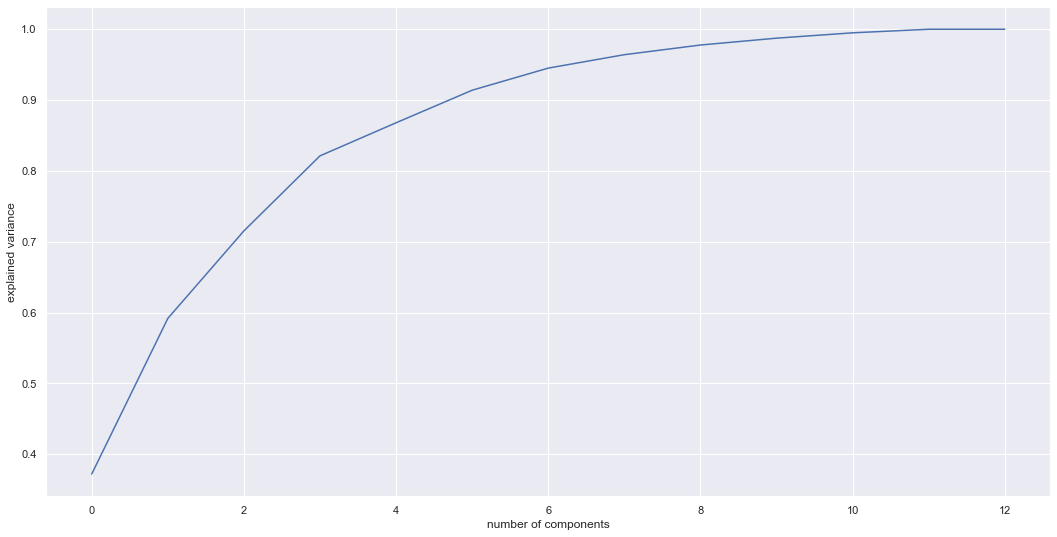

In [26]:
pca = PCA().fit(features)


plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('explained variance')
plt.show()

In [27]:
pca = PCA(n_components=8).fit(features)
joblib.dump(pca, './text_blob_train/trend/pca.pkl')
components = pca.transform(features)
features = pd.DataFrame(components)

In [28]:
features

0         1         2         3         4         5         6  \
0     0.417445  0.180760 -0.930823 -2.637445 -0.924590  0.396408  0.785934   
1    -0.847662  0.707977 -0.077843 -2.628368  0.131926  1.538447  0.144792   
2     0.795586  1.088059  0.175770  3.465712 -4.636148  3.213708  0.021191   
3     0.894492 -2.429157  0.041467  1.021522 -0.824484  0.412043  0.916442   
4    -0.227969  0.969985  0.308065 -0.988344  1.209797 -0.216433 -0.633420   
...        ...       ...       ...       ...       ...       ...       ...   
1551 -0.802802  0.522738  0.852278  2.393178  0.250878  0.116350 -0.759949   
1552 -2.008050  0.735626 -0.262949  1.111185  0.496740  0.289644 -0.159869   
1553 -0.295204 -1.055784 -0.461419  0.387391  0.290682  0.791608 -0.714997   
1554 -0.640053 -0.906108  0.579376  0.493474  0.126442  0.645412 -0.455820   
1555  0.793885 -0.448386 -0.546515  0.955585 -1.124153  0.682373  0.665544   

             7  
0     0.587509  
1     0.103371  
2    -0.622062  
3    -0.006705  
4     0.168265  
...        ...  
1551  0.208806  
1552 -0.043825  
1553  0.115760  
1554  0.250839  
1555 -0.005493  

[1556 rows x 8 columns]

In [29]:
features.to_csv("./text_blob_train/trend/train_features.csv")